<a href="https://colab.research.google.com/github/IndioP/Projeto_Ciencia_Dados/blob/main/preprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

##Acidentes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
acidentes=pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/acidentes_transito_2015_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#dando a primeira olhada nos dados...
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO
0,2015-12-03,11:36:00.000,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-01,06:35:00.000,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-01,08:04:00.000,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,NaN,NaN,SEMAFORO Nº217,NaN,NaN,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-01,08:06:00.000,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,NaN,NaN,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,NaN,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-01,08:13:00.000,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO CLUBE INTERNACIONAL,NaN,NaN,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#olhando os tipos que foram inferidos inicialmente no pandas
acidentes.dtypes

DATA                          object
HORA                          object
NATUREZA_ACIDENTE             object
SITUACAO                      object
BAIRRO                        object
ENDERECO                      object
NUMERO                        object
DETALHE_ENDERECO_ACIDENTE     object
COMPLEMENTO                   object
BAIRRO_CRUZAMENTO             object
NUM_SEMAFORO                 float64
SENTIDO_VIA                   object
TIPO                          object
DESCRICAO                     object
AUTO                         float64
MOTO                         float64
CICLOM                       float64
CICLISTA                     float64
PEDESTRE                     float64
ONIBUS                       float64
CAMINHAO                     float64
VIATURA                      float64
OUTROS                       float64
VITIMAS                      float64
VITIMASFATAIS                float64
ACIDENTE_VERIFICADO           object
TEMPO_CLIMA                   object
S

In [6]:
#como pouquissimos dados de hora estão ausentes, optamos por exclui-los o que não prejudicaria muito a nossa amostra...
acidentes.dropna(subset = ["HORA"], inplace=True)
acidentes['HORA'] = acidentes['HORA'].astype(str)
acidentes['HORA'] = acidentes['HORA'].str.slice(stop = 2)
#pegamos os primeiros 2 caracteres pois queriamos discretizar os horarios em manhã tarde e noite, para isso a hora seria o suficiente.

In [7]:
#apos um tempo apanhando, descobrimos que existia alguns dados invalidos na HORA que estavam prejudicando a nossa analise,
#então nos tivemos que nos livrar deles
acidentes['HORA'].unique()

array(['11', '06', '08', '09', '10', '12', '13', '14', '15', '16', '17',
       '18', '07', '19', '20', '21', '22', '01', '05', '23', '00', '03',
       '04', '02', 'ju', '29', 'CI', 'M', 'MA', '.', '48'], dtype=object)

In [8]:
#olhando a quantidade de dados invalidos que foram excluidos para medir o impacto que isso traria para a nossa analise
len(acidentes['HORA'])

58015

In [9]:
#nos livrando dos dados invalidos da coluna hora
#como podemos observar, não existia um numero expressivo de dados invalidos então simplesmente excluilos não seria um grande problema
acidentes = acidentes[acidentes.HORA != 'ju']
acidentes = acidentes[acidentes.HORA != '29']
acidentes = acidentes[acidentes.HORA != 'CI']
acidentes = acidentes[acidentes.HORA != 'M']
acidentes = acidentes[acidentes.HORA != 'MA']
acidentes = acidentes[acidentes.HORA != '.']
acidentes = acidentes[acidentes.HORA != '48']

len(acidentes['HORA'])


58008

In [10]:
#convertendo as horas para inteiro, pois posteriormente vamos usar o comparador de < <= > e >=...
acidentes['HORA'] = acidentes['HORA'].astype(int)

In [11]:
#DISCRETIZANDO as horas em periodos do dia
acidentes['PERIODO_DO_DIA'] = 'MANHA'
acidentes.loc[(acidentes['HORA'] < 6),'PERIODO_DO_DIA'] = 'MADRUGADA'
acidentes.loc[((acidentes['HORA'] >= 6) & (acidentes['HORA'] < 12)),'PERIODO_DO_DIA'] = 'MANHA'
acidentes.loc[((acidentes['HORA'] >= 12) & (acidentes['HORA'] < 18)),'PERIODO_DO_DIA'] = 'TARDE'
acidentes.loc[(acidentes['HORA'] > 18),'PERIODO_DO_DIA'] = 'NOITE'
acidentes['PERIODO_DO_DIA'] = acidentes['PERIODO_DO_DIA'].astype(str)

In [12]:
acidentes.head(5)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO,PERIODO_DO_DIA
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA
2,2015-06-01,8,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,NaN,NaN,SEMAFORO Nº217,NaN,NaN,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA
3,2015-06-01,8,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,NaN,NaN,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,NaN,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA
4,2015-06-01,8,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO CLUBE INTERNACIONAL,NaN,NaN,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA


In [13]:
#ajustando tipos dos dados

acidentes['DATA'] = pd.to_datetime(acidentes['DATA'], format='%Y-%m-%d', errors='ignore')
#acidentes['HORA'] = pd.to_datetime(acidentes['HORA'], format='%H:%M:%S', errors = 'ignore')

acidentes = acidentes.astype({'NATUREZA_ACIDENTE':'category','SITUACAO':'category','BAIRRO':'category','ENDERECO':'category','NUMERO':'category','DETALHE_ENDERECO_ACIDENTE':'category','COMPLEMENTO':'category','BAIRRO_CRUZAMENTO':'category','NUM_SEMAFORO':'category','SENTIDO_VIA':'category','TIPO':'category','DESCRICAO':'category','AUTO':'float','MOTO':'float','CICLOM':'float','CICLISTA':'float','PEDESTRE':'float','ONIBUS':'float','CAMINHAO':'float','VIATURA':'float','OUTROS':'float','VITIMAS':'float','VITIMASFATAIS':'float','ACIDENTE_VERIFICADO':'category','TEMPO_CLIMA':'category','SITUACAO_SEMAFORO':'category','SINALIZACAO':'category','CONDICAO_VIA':'category','CONSERVACAO_VIA':'category','PONTO_CONTROLE':'category','SITUACAO_PLACA':'category','VELOCIDADE_MAX_VIA':'category','MAO_DIRECAO':'category','DIVISAO_VIA1':'category','DIVISAO_VIA2':'category','DIVISAO_VIA3':'category','NATUREZA':'category','ENDERECO_CRUZAMENTO':'category','NUMERO_CRUZAMENTO':'category','REFERENCIA_CRUZAMENTO':'category'})

In [14]:
#visualizando os tipos depois do cast
acidentes.dtypes

DATA                         datetime64[ns]
HORA                                  int64
NATUREZA_ACIDENTE                  category
SITUACAO                           category
BAIRRO                             category
ENDERECO                           category
NUMERO                             category
DETALHE_ENDERECO_ACIDENTE          category
COMPLEMENTO                        category
BAIRRO_CRUZAMENTO                  category
NUM_SEMAFORO                       category
SENTIDO_VIA                        category
TIPO                               category
DESCRICAO                          category
AUTO                                float64
MOTO                                float64
CICLOM                              float64
CICLISTA                            float64
PEDESTRE                            float64
ONIBUS                              float64
CAMINHAO                            float64
VIATURA                             float64
OUTROS                          

In [15]:
acidentes.head(2)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO,PERIODO_DO_DIA
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA


In [16]:
#DISCRETIZANDO também o dia da semana baseado na data do dia
#vamos usar isso para futuras comparações
acidentes['DIA_DA_SEMANA'] = acidentes['DATA'].dt.dayofweek
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 0),'DIA_DA_SEMANA'] = 'SEGUNDA'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 1),'DIA_DA_SEMANA'] = 'TERCA'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 2),'DIA_DA_SEMANA'] = 'QUARTA'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 3),'DIA_DA_SEMANA'] = 'QUINTA'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 4),'DIA_DA_SEMANA'] = 'SEXTA'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 5),'DIA_DA_SEMANA'] = 'SABADO'
acidentes.loc[(acidentes['DIA_DA_SEMANA'] == 6),'DIA_DA_SEMANA'] = 'DOMINGO'

In [17]:
acidentes[['DATA','HORA','DIA_DA_SEMANA']].head(5)

,DATA,HORA,DIA_DA_SEMANA
0,2015-12-03,11,QUINTA
1,2015-06-01,6,SEGUNDA
2,2015-06-01,8,SEGUNDA
3,2015-06-01,8,SEGUNDA
4,2015-06-01,8,SEGUNDA


In [18]:
acidentes.head(2)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO,PERIODO_DO_DIA,DIA_DA_SEMANA
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,QUINTA
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA


In [19]:
#Talvez também fosse interessante ter informações de ANO e MES separadamente, para testes e analises futuros
acidentes['ANO'] = acidentes['DATA'].dt.year
acidentes['MES'] = acidentes['DATA'].dt.month

In [20]:
acidentes.head(5)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,NUMERO,DETALHE_ENDERECO_ACIDENTE,COMPLEMENTO,BAIRRO_CRUZAMENTO,NUM_SEMAFORO,SENTIDO_VIA,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,NaN,NaN,SENTIDO SUBURBIO E/F AO SESC,NaN,NaN,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,QUINTA,2015,12
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,NaN,NaN,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,NaN,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
2,2015-06-01,8,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,NaN,NaN,SEMAFORO Nº217,NaN,NaN,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
3,2015-06-01,8,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,NaN,NaN,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,NaN,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
4,2015-06-01,8,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO CLUBE INTERNACIONAL,NaN,NaN,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6




```
Tratando dados ausentes
```





In [21]:
#dando uma olhada em quais colunas possuem mais dados ausentes
print(acidentes.isnull().sum()/len(acidentes))

DATA                         0.000000
HORA                         0.000000
NATUREZA_ACIDENTE            0.007275
SITUACAO                     0.000931
BAIRRO                       0.005637
ENDERECO                     0.004068
NUMERO                       0.544890
DETALHE_ENDERECO_ACIDENTE    0.855468
COMPLEMENTO                  0.062319
BAIRRO_CRUZAMENTO            0.129189
NUM_SEMAFORO                 0.915581
SENTIDO_VIA                  0.776738
TIPO                         0.000983
DESCRICAO                    0.220383
AUTO                         0.093470
MOTO                         0.745277
CICLOM                       0.992984
CICLISTA                     0.985209
PEDESTRE                     0.978382
ONIBUS                       0.851951
CAMINHAO                     0.900496
VIATURA                      0.988295
OUTROS                       0.988536
VITIMAS                      0.004723
VITIMASFATAIS                0.997380
ACIDENTE_VERIFICADO          0.749414
TEMPO_CLIMA 

*** As colunas abaixo vão ser retiradas pela falta de valores ser muito elevada em relação ao dataset***

***NUMERO:*** além de que essa granularidade seria muito especifica para o nosso foco

***DETALHE_ENDERECO_ACIDENTE:*** é um valor muito subjetivo e pouco padronizado

***NUM_SEMAFORO:*** é um numero que não significa muita coisa pro nosso foco

***SENTIDO_VIA:*** seria muito especifico para os testes que a gente vai fazer

***DIVISAO_VIA2:*** existem poucas vias com 3 faixas

***DIVISAO_VIA3:*** existem poucas vias com 4 faixas

***NATUREZA:*** essa coluna ta vazia

***ENDERECO_CRUZAMENTO:***

***NUMERO_CRUZAMENTO:***

***REFERENCIA_CRUZAMENTO:***

In [22]:
#Visualizando um pouco sobre as colunas que será excluidas
excluidos = acidentes[[ 'NUMERO','DETALHE_ENDERECO_ACIDENTE','NUM_SEMAFORO','SENTIDO_VIA','DIVISAO_VIA2','DIVISAO_VIA3','NATUREZA','ENDERECO_CRUZAMENTO','NUMERO_CRUZAMENTO','REFERENCIA_CRUZAMENTO']]
excluidos[excluidos['NUMERO_CRUZAMENTO'] == '200'].head(5)

,NUMERO,DETALHE_ENDERECO_ACIDENTE,NUM_SEMAFORO,SENTIDO_VIA,DIVISAO_VIA2,DIVISAO_VIA3,NATUREZA,ENDERECO_CRUZAMENTO,NUMERO_CRUZAMENTO,REFERENCIA_CRUZAMENTO
8500,200,NaN,NaN,NaN,NaN,NaN,NaN,AV PROFESSOR LUIZ FREIRE,200,PROX DO QUARTEL 7 REGIAO E/F DO DEPARTAMENTO D...
8501,200,NaN,NaN,NaN,NaN,NaN,NaN,AV PROFESSOR LUIZ FREIRE,200,EM FRENTE AO QUARTEL DA SETIMA REGIÃO E IFPE
9917,200,NaN,NaN,NaN,NaN,NaN,NaN,RUA MARCOS ANDRE,200,PROX. AO CARREFOUR
11825,200,NaN,NaN,NaN,NaN,NaN,NaN,RUA JOAQUIM FELIPE,200,EM FRENTE A FACULDADE IBGM
12162,200,NaN,NaN,NaN,NaN,NaN,NaN,AV CAXANGA,200,TRANPORTADORA GRANERO


In [23]:
#Apagando as colunas selecionadas para serem excluidas
acidentes = acidentes.drop([ 'NUMERO','DETALHE_ENDERECO_ACIDENTE','NUM_SEMAFORO','SENTIDO_VIA','DIVISAO_VIA2','DIVISAO_VIA3','NATUREZA','ENDERECO_CRUZAMENTO','NUMERO_CRUZAMENTO','REFERENCIA_CRUZAMENTO'], axis=1)

In [24]:
acidentes['SITUACAO'].unique()

['CANCELADA', 'FINALIZADA', 'EM ATENDIMENTO', 'PENDENTE', 'EM ABERTO', NaN, 'DUPLICIDADE', 'EQUIPE EM DESLOCAMENTO', 'EQUIPE NO LOCAL']
Categories (8, object): ['CANCELADA', 'FINALIZADA', 'EM ATENDIMENTO', 'PENDENTE', 'EM ABERTO',
                         'DUPLICIDADE', 'EQUIPE EM DESLOCAMENTO', 'EQUIPE NO LOCAL']

In [25]:
#olhando a tabela apos a exclusão das colunas desnecessarias
acidentes.head()

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES
0,2015-12-03,11,SEM VÍTIMA,CANCELADA,CASA AMARELA,AV NORTE,SENTIDO SUBURBIO E/F AO SESC,NaN,COLISÃO,COLISÃO SEM VITIMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,QUINTA,2015,12
1,2015-06-01,6,SEM VÍTIMA,FINALIZADA,ENCRUZILHADA,EST DE BELEM,IGREJA BATISTA MEMORIAL DE BELÉM,NaN,COLISÃO,SEM VÍTIMAS.,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
2,2015-06-01,8,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA ERNESTO DE PAULA SANTOS,SEMAFORO Nº217,NaN,COLISÃO,SEM VITIMA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
3,2015-06-01,8,SEM VÍTIMA,FINALIZADA,AFOGADOS,AV SUL,AO LADO DA ESTAÇAO LARGO DA PAZ,NaN,COLISÃO,COLISAO S/V,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6
4,2015-06-01,8,SEM VÍTIMA,CANCELADA,MADALENA,RUA BENFICA,EM FRENTE AO CLUBE INTERNACIONAL,NaN,COLISÃO,GM RIBEIRO JA NO LOCAL VT 05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANHA,SEGUNDA,2015,6


In [26]:
#percebemos que a coluna NATUREZA_ACIDENTE tem um dado redundante que poderia nos ajudar a repopular a coluna vitima e vitia fatal
acidentes.NATUREZA_ACIDENTE.unique()

['SEM VÍTIMA', 'COM VÍTIMA', 'VÍTIMA FATAL', NaN, 'ENTRADA E SAÍDA', 'APOIO']
Categories (5, object): ['SEM VÍTIMA', 'COM VÍTIMA', 'VÍTIMA FATAL', 'ENTRADA E SAÍDA', 'APOIO']

In [27]:
#usando os valores da tabela NATUREZA_ACIDENTE para repopular a coluna vitimas fatais
acidentes.loc[(acidentes['VITIMASFATAIS'].isnull()) & (acidentes['NATUREZA_ACIDENTE'] == 'VÍTIMA FATAL'),'VITIMASFATAIS'] = 1.0

In [28]:
#como não podemos assumir nada a respeito dessas linhas, vamos zerar o valor de vitimas fatais
acidentes.loc[(acidentes['VITIMASFATAIS'].isnull()),'VITIMASFATAIS'] = 0.0

In [29]:
acidentes[acidentes['VITIMASFATAIS'] == 1].count()

DATA                   166
HORA                   166
NATUREZA_ACIDENTE      166
SITUACAO               166
BAIRRO                 165
ENDERECO               166
COMPLEMENTO            160
BAIRRO_CRUZAMENTO      142
TIPO                   166
DESCRICAO              128
AUTO                    74
MOTO                    71
CICLOM                   7
CICLISTA                18
PEDESTRE                50
ONIBUS                  37
CAMINHAO                22
VIATURA                  0
OUTROS                   2
VITIMAS                 43
VITIMASFATAIS          166
ACIDENTE_VERIFICADO     51
TEMPO_CLIMA             51
SITUACAO_SEMAFORO       51
SINALIZACAO             47
CONDICAO_VIA            51
CONSERVACAO_VIA         49
PONTO_CONTROLE          40
SITUACAO_PLACA          42
VELOCIDADE_MAX_VIA      15
MAO_DIRECAO             47
DIVISAO_VIA1            46
PERIODO_DO_DIA         166
DIA_DA_SEMANA          166
ANO                    166
MES                    166
dtype: int64

In [30]:
#já melhoramos a ausencia de valores na coluna de vitimas fatais
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.093470
MOTO                   0.745277
CICLOM                 0.992984
CICLISTA               0.985209
PEDESTRE               0.978382
ONIBUS                 0.851951
CAMINHAO               0.900496
VIATURA                0.988295
OUTROS                 0.988536
VITIMAS                0.004723
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

In [31]:
#vamos fazer o mesmo para as vitimas leves
acidentes.loc[(acidentes['VITIMAS'].isnull()) & (acidentes['NATUREZA_ACIDENTE'] == 'COM VÍTIMA'),'VITIMAS'] = 1.0  

In [32]:
acidentes.loc[(acidentes['VITIMAS'].isnull()) ,'VITIMAS'] = 0.0

In [33]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.000000
HORA                   0.000000
NATUREZA_ACIDENTE      0.007275
SITUACAO               0.000931
BAIRRO                 0.005637
ENDERECO               0.004068
COMPLEMENTO            0.062319
BAIRRO_CRUZAMENTO      0.129189
TIPO                   0.000983
DESCRICAO              0.220383
AUTO                   0.093470
MOTO                   0.745277
CICLOM                 0.992984
CICLISTA               0.985209
PEDESTRE               0.978382
ONIBUS                 0.851951
CAMINHAO               0.900496
VIATURA                0.988295
OUTROS                 0.988536
VITIMAS                0.000000
VITIMASFATAIS          0.000000
ACIDENTE_VERIFICADO    0.749414
TEMPO_CLIMA            0.739553
SITUACAO_SEMAFORO      0.742880
SINALIZACAO            0.744415
CONDICAO_VIA           0.740381
CONSERVACAO_VIA        0.744087
PONTO_CONTROLE         0.764929
SITUACAO_PLACA         0.764860
VELOCIDADE_MAX_VIA     0.921666
MAO_DIRECAO            0.744518
DIVISAO_

In [34]:
#Tratando os dados categoricos, adicionando uma nova categoria para eles, como SEM INFORMACAO
acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].astype('string')
acidentes['NATUREZA_ACIDENTE'].fillna('SEM INFORMACAO',inplace=True)
acidentes['SITUACAO'] = acidentes['SITUACAO'].astype('string')
acidentes['SITUACAO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['BAIRRO'] = acidentes['BAIRRO'].astype('string')
acidentes['BAIRRO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['ENDERECO'] = acidentes['ENDERECO'].astype('string')
acidentes['ENDERECO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['COMPLEMENTO'] = acidentes['COMPLEMENTO'].astype('string')
acidentes['COMPLEMENTO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['BAIRRO_CRUZAMENTO'] = acidentes['BAIRRO_CRUZAMENTO'].astype('string')
acidentes['BAIRRO_CRUZAMENTO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['TIPO'] = acidentes['TIPO'].astype('string')
acidentes['TIPO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['DESCRICAO'] = acidentes['DESCRICAO'].astype('string')
acidentes['DESCRICAO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['ACIDENTE_VERIFICADO'] = acidentes['ACIDENTE_VERIFICADO'].astype('string')
acidentes['ACIDENTE_VERIFICADO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['TEMPO_CLIMA'] = acidentes['TEMPO_CLIMA'].astype('string')
acidentes['TEMPO_CLIMA'].fillna('SEM INFORMACAO',inplace=True)
acidentes['SITUACAO_SEMAFORO'] = acidentes['SITUACAO_SEMAFORO'].astype('string')
acidentes['SITUACAO_SEMAFORO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['SINALIZACAO'] = acidentes['SINALIZACAO'].astype('string')
acidentes['SINALIZACAO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['CONDICAO_VIA'] = acidentes['CONDICAO_VIA'].astype('string')
acidentes['CONDICAO_VIA'].fillna('SEM INFORMACAO',inplace=True)
acidentes['CONSERVACAO_VIA'] = acidentes['CONSERVACAO_VIA'].astype('string')
acidentes['CONSERVACAO_VIA'].fillna('SEM INFORMACAO',inplace=True)
acidentes['PONTO_CONTROLE'] = acidentes['PONTO_CONTROLE'].astype('string')
acidentes['PONTO_CONTROLE'].fillna('SEM INFORMACAO',inplace=True)
acidentes['SITUACAO_PLACA'] = acidentes['SITUACAO_PLACA'].astype('string')
acidentes['SITUACAO_PLACA'].fillna('SEM INFORMACAO',inplace=True)
acidentes['VELOCIDADE_MAX_VIA'] = acidentes['VELOCIDADE_MAX_VIA'].astype('string')
acidentes['VELOCIDADE_MAX_VIA'].fillna('SEM INFORMACAO',inplace=True)
acidentes['MAO_DIRECAO'] = acidentes['MAO_DIRECAO'].astype('string')
acidentes['MAO_DIRECAO'].fillna('SEM INFORMACAO',inplace=True)
acidentes['DIVISAO_VIA1'] = acidentes['DIVISAO_VIA1'].astype('string')
acidentes['DIVISAO_VIA1'].fillna('SEM INFORMACAO',inplace=True)


acidentes['NATUREZA_ACIDENTE'] = acidentes['NATUREZA_ACIDENTE'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
acidentes['SITUACAO'] = acidentes['SITUACAO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['BAIRRO'] = acidentes['BAIRRO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['ENDERECO'] = acidentes['ENDERECO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['COMPLEMENTO'] = acidentes['COMPLEMENTO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['BAIRRO_CRUZAMENTO'] = acidentes['BAIRRO_CRUZAMENTO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['TIPO'] = acidentes['TIPO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['DESCRICAO'] = acidentes['DESCRICAO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['ACIDENTE_VERIFICADO'] = acidentes['ACIDENTE_VERIFICADO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['TEMPO_CLIMA'] = acidentes['TEMPO_CLIMA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['SITUACAO_SEMAFORO'] = acidentes['SITUACAO_SEMAFORO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['SINALIZACAO'] = acidentes['SINALIZACAO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['CONDICAO_VIA'] = acidentes['CONDICAO_VIA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['CONSERVACAO_VIA'] = acidentes['CONSERVACAO_VIA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['PONTO_CONTROLE'] = acidentes['PONTO_CONTROLE'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['SITUACAO_PLACA'] = acidentes['SITUACAO_PLACA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['VELOCIDADE_MAX_VIA'] = acidentes['VELOCIDADE_MAX_VIA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['VELOCIDADE_MAX_VIA'] = acidentes['VELOCIDADE_MAX_VIA'].apply(lambda x: x.split('KM')[0].strip() if 'KM' in x else 'SEM INFORMACAO')
acidentes['MAO_DIRECAO'] = acidentes['MAO_DIRECAO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 
acidentes['DIVISAO_VIA1'] = acidentes['DIVISAO_VIA1'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category') 

In [35]:
acidentes['VELOCIDADE_MAX_VIA'].unique()

array(['SEM INFORMACAO', '60', '30', '40', '50', '20', '10', '30 E 40'],
      dtype=object)

In [36]:
#aqui vamos zerar os valores ausentes das colunas dos elementos envolvidos no acidente
acidentes['AUTO'] = acidentes['AUTO'].fillna(0)
acidentes['MOTO'] = acidentes['MOTO'].fillna(0)
acidentes['CICLOM'] = acidentes['CICLOM'].fillna(0)
acidentes['CICLISTA'] = acidentes['CICLISTA'].fillna(0)
acidentes['PEDESTRE'] = acidentes['PEDESTRE'].fillna(0)
acidentes['ONIBUS'] = acidentes['ONIBUS'].fillna(0)
acidentes['CAMINHAO'] = acidentes['CAMINHAO'].fillna(0)
acidentes['VIATURA'] = acidentes['VIATURA'].fillna(0)
acidentes['OUTROS'] = acidentes['OUTROS'].fillna(0)

In [37]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.0
HORA                   0.0
NATUREZA_ACIDENTE      0.0
SITUACAO               0.0
BAIRRO                 0.0
ENDERECO               0.0
COMPLEMENTO            0.0
BAIRRO_CRUZAMENTO      0.0
TIPO                   0.0
DESCRICAO              0.0
AUTO                   0.0
MOTO                   0.0
CICLOM                 0.0
CICLISTA               0.0
PEDESTRE               0.0
ONIBUS                 0.0
CAMINHAO               0.0
VIATURA                0.0
OUTROS                 0.0
VITIMAS                0.0
VITIMASFATAIS          0.0
ACIDENTE_VERIFICADO    0.0
TEMPO_CLIMA            0.0
SITUACAO_SEMAFORO      0.0
SINALIZACAO            0.0
CONDICAO_VIA           0.0
CONSERVACAO_VIA        0.0
PONTO_CONTROLE         0.0
SITUACAO_PLACA         0.0
VELOCIDADE_MAX_VIA     0.0
MAO_DIRECAO            0.0
DIVISAO_VIA1           0.0
PERIODO_DO_DIA         0.0
DIA_DA_SEMANA          0.0
ANO                    0.0
MES                    0.0
dtype: float64


In [38]:
#Visualizando as colunas categoricas, para analisar quais possiveis analises podem ser tiradas a partir delas
acidentes[acidentes['TEMPO_CLIMA']!= 'SEM INFORMACAO'].head(5)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES
38960,2018-10-12,4,SEM VITIMA,FINALIZADA,MADALENA,EST DOS REMEDIOS,CRUZAMENTO COM A AV ADBIAS DE CARVALHO // SEMA...,MADALENA,ABALROAMENTO LONGITUDINAL,COLISAO ENTRE DOIS AUTOS S/V,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CRUZAMENTO,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,AGENTE,SEM INFORMACAO,60,UNICA,FAIXA CONTINUA,MADRUGADA,SEXTA,2018,10
38963,2018-10-12,11,SEM VITIMA,FINALIZADA,TEJIPIO,AV DR JOSE RUFINO,AO LADO DO COLEGIO ESTADUAL EDWIRGENS DE SA PE...,TEJIPIO,COLISAO TRASEIRA,SEM VITIMAS/CTTU VT 24 NO LOCAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LONGO DA VIA,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,NAO EXISTE,NAO HA PLACAS,SEM INFORMACAO,DUPLA,FAIXA CONTINUA,MANHA,SEXTA,2018,10
38964,2018-11-08,7,SEM VITIMA,SEM INFORMACAO,DOIS IRMAOS,RUA MANUEL DE MEDEIROS,EM FRENTE A PRACA DOIS IRMAOS,DOIS IRMAOS,COLISAO TRASEIRA,COLISAO SEM VITIMAS,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OUTROS,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,SEM INFORMACAO,OUTRAS,30,DUPLA,FAIXA CONTINUA,MANHA,QUINTA,2018,11
38965,2018-10-12,12,SEM VITIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,"EM FRENTE AO ATACADO DOS PRESENTES, SENTIDO CABO",IMBIRIBEIRA,ABALROAMENTO LONGITUDINAL,ONIBUS E CAMINHAO S/V,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,LONGO DA VIA,BOM,NAO EXISTE,PERFEITO ESTADO,SECA,PERFEITO ESTADO,NAO EXISTE,NAO HA PLACAS,SEM INFORMACAO,DUPLA,CANTEIRO CENTRAL,TARDE,SEXTA,2018,10
38966,2018-10-12,13,SEM VITIMA,FINALIZADA,CAMPO GRANDE,AV GOVERNADOR AGAMENON MAGALHAES,ALCA DE RETORNO PARA VIA LOCAL / PROX A O 13O BPM,CAMPO GRANDE,CHOQUE VEICULO PARADO,COLISAO SEM VITIMAS,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OUTROS,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,NAO EXISTE,NAO HA PLACAS,30,UNICA,NAO EXISTE,TARDE,SEXTA,2018,10


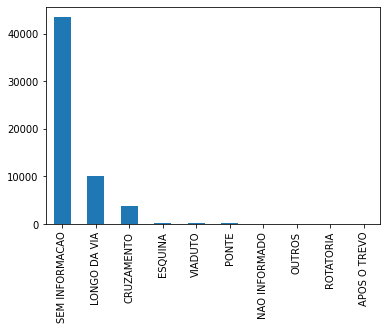

In [39]:
#Visualizando um pouco o conteudo dessas colunas para entender como podemos utiliza-las melhor
acidentes['ACIDENTE_VERIFICADO'].value_counts().plot(kind='bar')

In [40]:
acidentes['ACIDENTE_VERIFICADO'].unique()

['SEM INFORMACAO', 'CRUZAMENTO', 'LONGO DA VIA', 'OUTROS', 'PONTE', 'VIADUTO', 'ESQUINA', 'APOS O TREVO', 'NAO INFORMADO', 'ROTATORIA']
Categories (10, object): ['SEM INFORMACAO', 'CRUZAMENTO', 'LONGO DA VIA', 'OUTROS', ..., 'ESQUINA',
                          'APOS O TREVO', 'NAO INFORMADO', 'ROTATORIA']

In [41]:
acidentes['TIPO'].unique()

['COLISAO', 'CHOQUE', 'ATROPELAMENTO ANIMAL', 'QUEDA DE ARVORE', 'ATROPELAMENTO', ..., 'CHOQUE VEICULO PARADO', 'ABALROAMENTO TRANSVERSAL', 'COLISAO FRONTAL', 'CHOQUE OBJETO FIXO', 'SUBURBIO']
Length: 23
Categories (23, object): ['COLISAO', 'CHOQUE', 'ATROPELAMENTO ANIMAL', 'QUEDA DE ARVORE', ...,
                          'ABALROAMENTO TRANSVERSAL', 'COLISAO FRONTAL', 'CHOQUE OBJETO FIXO', 'SUBURBIO']

In [42]:
acidentes['DESCRICAO'].unique()

['COLISAO SEM VITIMAS', 'SEM VITIMAS ', 'SEM VITIMA', 'COLISAO S/V', 'GM RIBEIRO JA NO LOCAL VT 05', ..., 'COM VITIMA AGUARDANDO SAMU / CONDUTOR DO AUTO..., 'COLISAO 2 AUTOS - SEGUIDA DE CAPOTAMENTO - C/..., 'COM VITIMAS / BOMBEIROS NO LOCAL', 'COLISAO AUTO X MOTO / VT 14 NO LOCAL', 'COLISAO CARRO X MOTO / CARRO SE EVADIU DO LOC...]
Length: 10997
Categories (10997, object): ['COLISAO SEM VITIMAS', 'SEM VITIMAS ', 'SEM VITIMA', 'COLISAO S/V', ...,
                             'COLISAO 2 AUTOS - SEGUIDA DE CAPOTAMENTO - C/..., 'COM VITIMAS / BOMBEIROS NO LOCAL',
                             'COLISAO AUTO X MOTO / VT 14 NO LOCAL', 'COLISAO CARRO X MOTO / CARRO SE EVADIU DO LOC...]

In [43]:
print(acidentes.isnull().sum()/len(acidentes))

DATA                   0.0
HORA                   0.0
NATUREZA_ACIDENTE      0.0
SITUACAO               0.0
BAIRRO                 0.0
ENDERECO               0.0
COMPLEMENTO            0.0
BAIRRO_CRUZAMENTO      0.0
TIPO                   0.0
DESCRICAO              0.0
AUTO                   0.0
MOTO                   0.0
CICLOM                 0.0
CICLISTA               0.0
PEDESTRE               0.0
ONIBUS                 0.0
CAMINHAO               0.0
VIATURA                0.0
OUTROS                 0.0
VITIMAS                0.0
VITIMASFATAIS          0.0
ACIDENTE_VERIFICADO    0.0
TEMPO_CLIMA            0.0
SITUACAO_SEMAFORO      0.0
SINALIZACAO            0.0
CONDICAO_VIA           0.0
CONSERVACAO_VIA        0.0
PONTO_CONTROLE         0.0
SITUACAO_PLACA         0.0
VELOCIDADE_MAX_VIA     0.0
MAO_DIRECAO            0.0
DIVISAO_VIA1           0.0
PERIODO_DO_DIA         0.0
DIA_DA_SEMANA          0.0
ANO                    0.0
MES                    0.0
dtype: float64


In [44]:
#Tentando criar uma serie temporal para aplicar a NORMALIZAÇÃO e aplicação de outliers
acidentes['QTD_ACIDENTES'] = 1

df_dia_semana = pd.DataFrame(acidentes.groupby(["DATA","DIA_DA_SEMANA"])["QTD_ACIDENTES"].count())
df_dia_semana = df_dia_semana.reset_index()

df_anual = pd.DataFrame(acidentes.groupby(["ANO"])["QTD_ACIDENTES"].count())
df_anual = df_anual.reset_index()

df_mensal = pd.DataFrame(acidentes.groupby(["ANO","MES"])["QTD_ACIDENTES"].count())
df_mensal = df_mensal.reset_index()

#Aqui foi gerado uma dúvida, será que seria melhor pegar a distribuição dos dias por ANO, MES, ao inves da DATA que possui ANO,MES,DIA
#df_dia = pd.DataFrame(acidentes.groupby(["ANO","MES","DIA_DA_SEMANA"])["QTD_ACIDENTES"].count())
#df_dia = df_dia.reset_index()

In [45]:
df_dia_semana.head(5)

,DATA,DIA_DA_SEMANA,QTD_ACIDENTES
0,2015-06-01,SEGUNDA,39
1,2015-06-02,TERCA,49
2,2015-06-03,QUARTA,46
3,2015-06-04,QUINTA,28
4,2015-06-05,SEXTA,40


In [46]:
df_anual.head(5)

,ANO,QTD_ACIDENTES
0,2015,7273
1,2016,11256
2,2017,11736
3,2018,11395
4,2019,12045


In [47]:
df_mensal.head(5)

,ANO,MES,QTD_ACIDENTES
0,2015,6,976
1,2015,7,1034
2,2015,8,1048
3,2015,9,1036
4,2015,10,1079


## Visualizando alguns gráficos e tratando alguns outliers

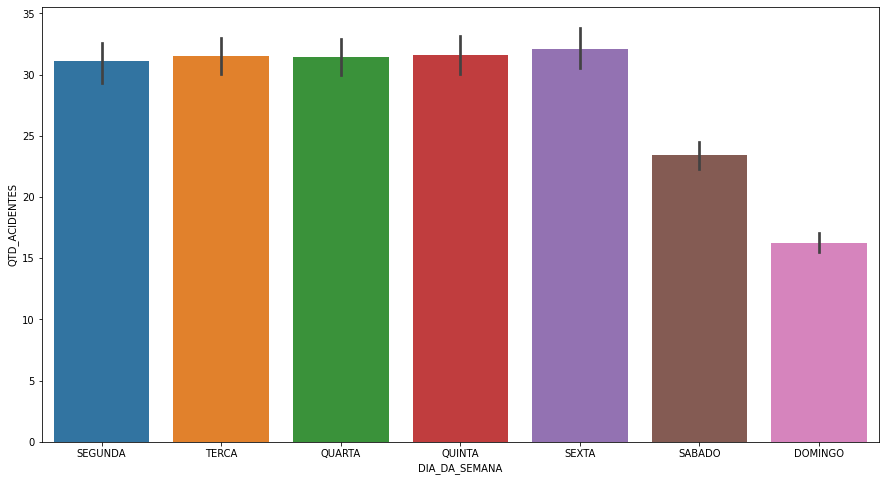

In [48]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="DIA_DA_SEMANA", y="QTD_ACIDENTES",order=["SEGUNDA", "TERCA","QUARTA","QUINTA","SEXTA","SABADO","DOMINGO"], data=df_dia_semana)

No gráfico acima, podemos visualizar que em relação aos nossos dados, os finais de semana possuem uma quantidade menor de acidentes, mais a frente, vamos analisar como ocorre essa distribuição em relação a ***HORARIOS***, e ***TIPOS DE ACIDENTES***

In [49]:
df_mensal

,ANO,MES,QTD_ACIDENTES
0,2015,6,976
1,2015,7,1034
2,2015,8,1048
3,2015,9,1036
4,2015,10,1079
...,...,...,...
63,2020,9,183
64,2020,10,216
65,2020,11,271
66,2020,12,229


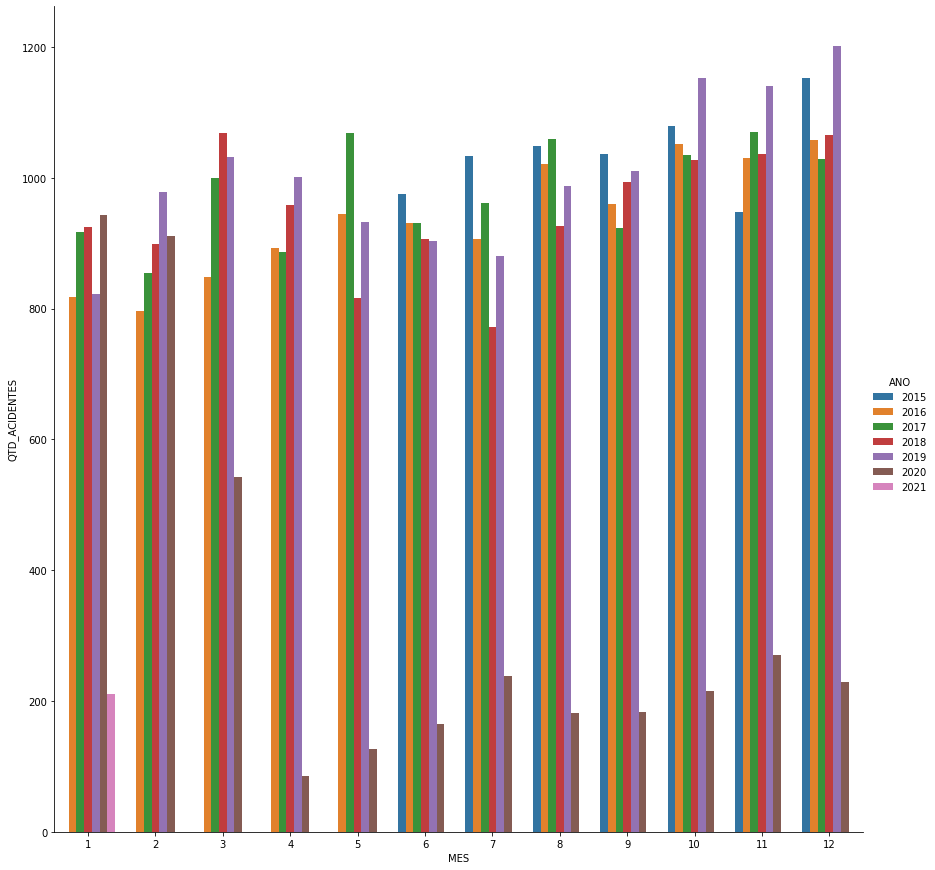

In [50]:
sns.catplot(x="MES", y="QTD_ACIDENTES", hue="ANO", kind="bar", data=df_mensal,height=12)

- No gráfico acima, podemos visualizar a forma como os acidentes estão distribuidos durante os útlimos ***5 ANOS***, distribuido também por seus respectivos ***MESES***
- Nesse gráfico, fica claro o quanto a ***PANDEMIA*** influenciou na diminuição das ocorrências de acidentes. Vemos que, a partir de ***MARÇO*** mês onde iniciou-se os primeiros ***LOCKDOWNS*** e no decorrer do ano, até os dados mais recentes que estão na tabela ***JANEIRO 2021***, a diminuição em relação aos outros ***ANOS/MESES***, é nítida.

In [51]:
df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'SEGUNDA'].describe()

,QTD_ACIDENTES
count,293.000000
mean,31.105802
std,13.758151
min,1.000000
25%,24.000000
50%,34.000000
75%,41.000000
max,62.000000


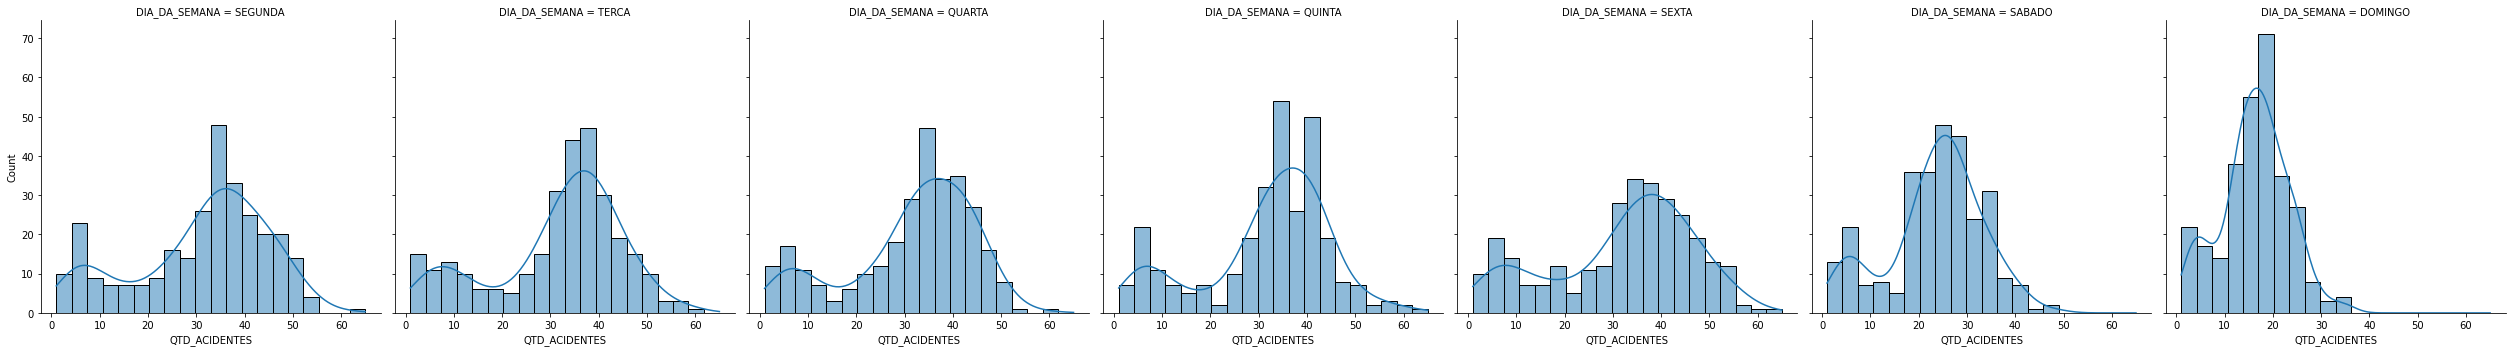

In [52]:
sns.displot(df_dia_semana, x="QTD_ACIDENTES", col="DIA_DA_SEMANA", kde=True, multiple="dodge")

Podemos visualizar as distribuições de acordo com cada DIA DA SEMANA e a QTD_ACIDENTES que aconteceram ao longo dos ultimos ANOS

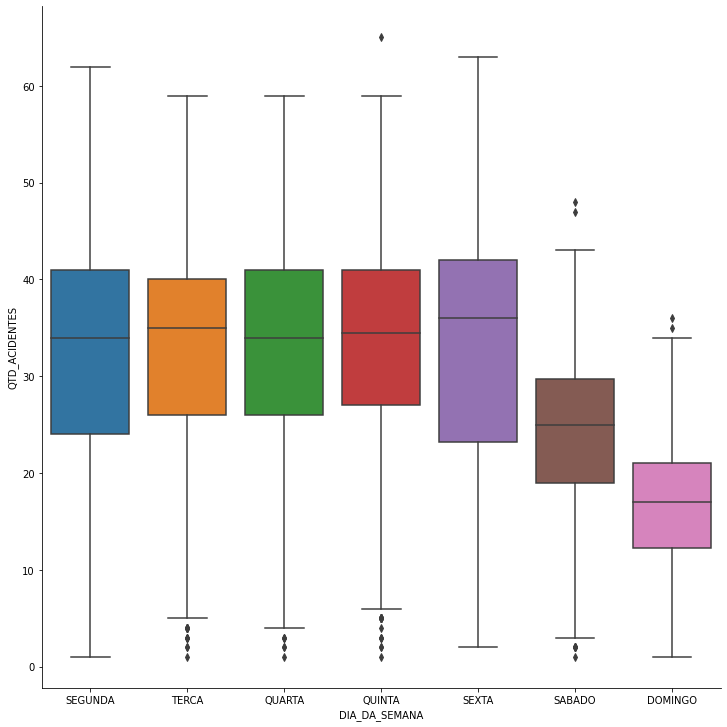

In [53]:
sns.catplot(x="DIA_DA_SEMANA", y="QTD_ACIDENTES", kind="box", data=df_dia_semana,height=10)

Acima, podemos visualizar os gráficos ***BOXPLOT*** da distribuição dos dados em relação aos ***DIAS DA SEMANA*** e a presenção de alguns valores que estão fora dos quartis gerados, esse são os OUTLIERS que vamos tentar remove-los a seguir

In [54]:
#Aqui separamos o DATASET pelos DIAS DA SEMANA, para podermos analisar e tentar tratar os casos de outliers
segunda = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'SEGUNDA']
terca = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'TERCA']
quarta = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'QUARTA']
quinta = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'QUINTA']
sexta = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'SEXTA']
sabado = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'SABADO']
domingo = df_dia_semana[df_dia_semana['DIA_DA_SEMANA'] == 'DOMINGO']

In [55]:
IQR_SEGUNDA = segunda['QTD_ACIDENTES'].describe()[6] - segunda['QTD_ACIDENTES'].describe()[4]
segunda = segunda[(segunda.QTD_ACIDENTES > (segunda['QTD_ACIDENTES'].describe()[4] - IQR_SEGUNDA)) & (segunda.QTD_ACIDENTES < (segunda['QTD_ACIDENTES'].describe()[6] + IQR_SEGUNDA))]

IQR_TERCA = terca['QTD_ACIDENTES'].describe()[6] - terca['QTD_ACIDENTES'].describe()[4]
terca = terca[(terca.QTD_ACIDENTES > (terca['QTD_ACIDENTES'].describe()[4] - IQR_TERCA)) & (terca.QTD_ACIDENTES < (terca['QTD_ACIDENTES'].describe()[6] + IQR_TERCA))]

IQR_QUARTA= quarta['QTD_ACIDENTES'].describe()[6] - quarta['QTD_ACIDENTES'].describe()[4]
quarta = quarta[(quarta.QTD_ACIDENTES > (quarta['QTD_ACIDENTES'].describe()[4] - IQR_QUARTA)) & (quarta.QTD_ACIDENTES < (quarta['QTD_ACIDENTES'].describe()[6] + IQR_QUARTA))]

IQR_QUINTA = quinta['QTD_ACIDENTES'].describe()[6] - quinta['QTD_ACIDENTES'].describe()[4]
quinta = quinta[(quinta.QTD_ACIDENTES > (quinta['QTD_ACIDENTES'].describe()[4] - IQR_QUINTA)) & (quinta.QTD_ACIDENTES < (quinta['QTD_ACIDENTES'].describe()[6] + IQR_QUINTA))]

IQR_SEXTA = sexta['QTD_ACIDENTES'].describe()[6] - sexta['QTD_ACIDENTES'].describe()[4]
sexta = sexta[(sexta.QTD_ACIDENTES > (sexta['QTD_ACIDENTES'].describe()[4] - IQR_SEXTA)) & (sexta.QTD_ACIDENTES < (sexta['QTD_ACIDENTES'].describe()[6] + IQR_SEXTA))]

IQR_SABADO = sabado['QTD_ACIDENTES'].describe()[6] - sabado['QTD_ACIDENTES'].describe()[4]
sabado = sabado[(sabado.QTD_ACIDENTES > (sabado['QTD_ACIDENTES'].describe()[4] - IQR_SABADO)) & (sabado.QTD_ACIDENTES < (sabado['QTD_ACIDENTES'].describe()[6] + IQR_SABADO))]

IQR_DOMINGO = domingo['QTD_ACIDENTES'].describe()[6] - domingo['QTD_ACIDENTES'].describe()[4]
domingo = domingo[(domingo.QTD_ACIDENTES > (domingo['QTD_ACIDENTES'].describe()[4] - IQR_DOMINGO)) & (domingo.QTD_ACIDENTES < (domingo['QTD_ACIDENTES'].describe()[6] + IQR_DOMINGO))]

In [56]:
tables = [segunda, terca, quarta, quinta, sexta, sabado, domingo]
result = pd.concat(tables)

In [57]:
result

,DATA,DIA_DA_SEMANA,QTD_ACIDENTES
0,2015-06-01,SEGUNDA,39
7,2015-06-08,SEGUNDA,42
14,2015-06-15,SEGUNDA,38
21,2015-06-22,SEGUNDA,38
28,2015-06-29,SEGUNDA,35
...,...,...,...
2014,2020-12-20,DOMINGO,4
2021,2020-12-27,DOMINGO,6
2028,2021-01-03,DOMINGO,5
2042,2021-01-17,DOMINGO,12


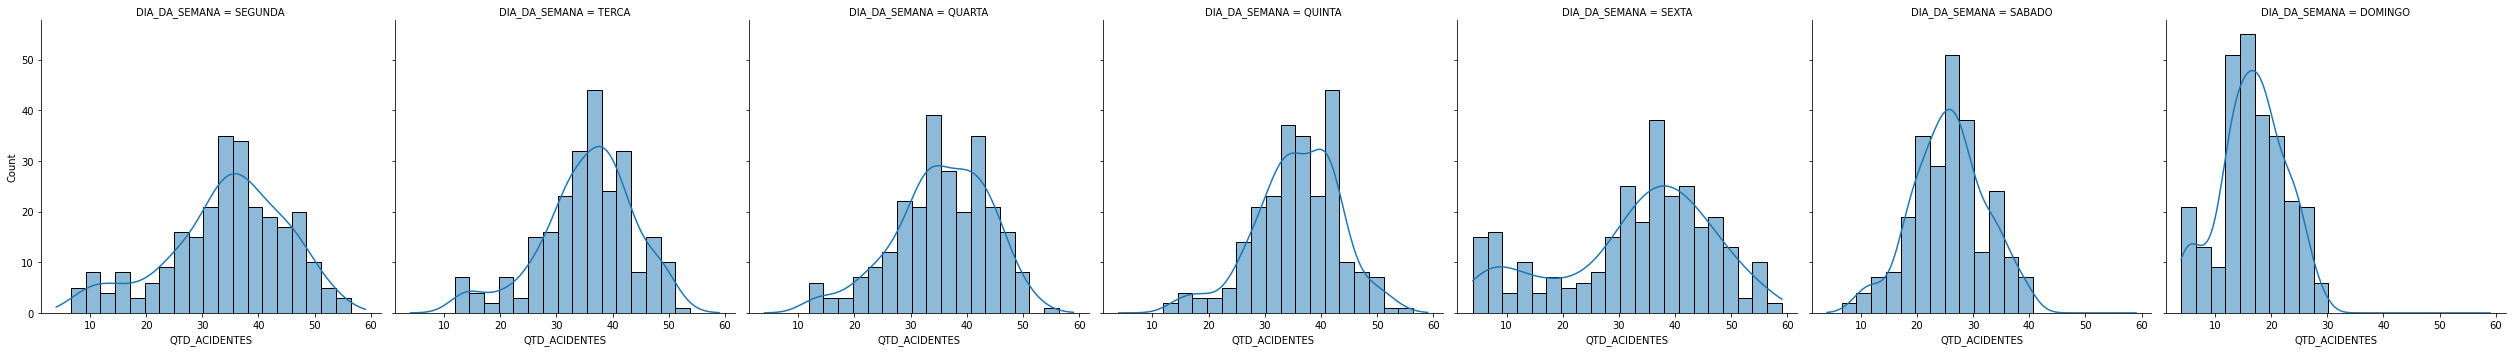

In [58]:
sns.displot(result, x="QTD_ACIDENTES", col="DIA_DA_SEMANA", kde=True, multiple="dodge")

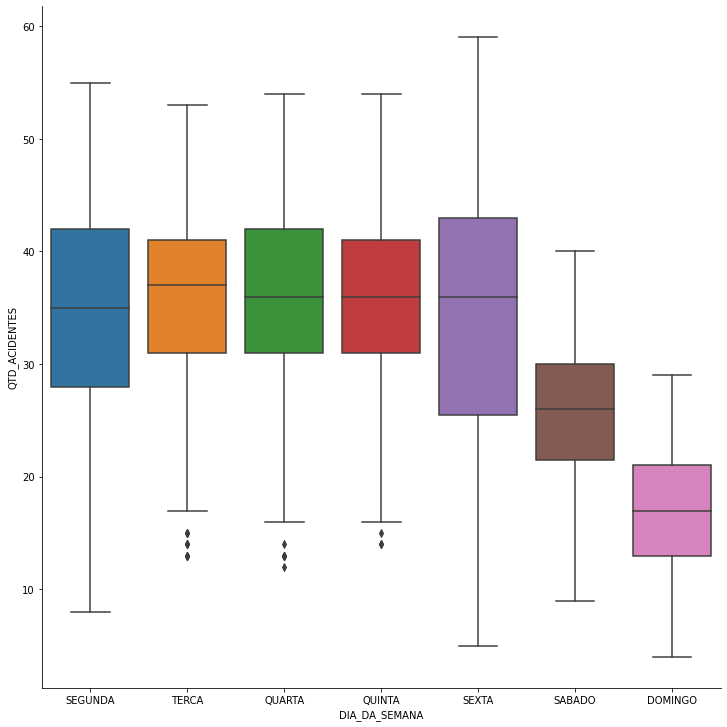

In [59]:
sns.catplot(x="DIA_DA_SEMANA", y="QTD_ACIDENTES", kind="box", data=result,height=10)

Após realizarmos os tratamentos, podemos visualizar que, embora tenha aparecido novamente alguns outliers, a distribuição está um pouco mais centralizada na mediana da distribuição

Agora, vamos fazer algumas analises a partir de algumas colunas ***CATEGORICAS*** e que possam ter informações (mesmo que especificas para alguns anos), de CLIMA, ESTADO DA ESTRADA, SINALIZAÇÃO, VELOCIDADE DA VIA, ETC...

In [60]:
acidentes[acidentes['ACIDENTE_VERIFICADO'] != 'SEM INFORMACAO'].head(3)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES,QTD_ACIDENTES
38960,2018-10-12,4,SEM VITIMA,FINALIZADA,MADALENA,EST DOS REMEDIOS,CRUZAMENTO COM A AV ADBIAS DE CARVALHO // SEMA...,MADALENA,ABALROAMENTO LONGITUDINAL,COLISAO ENTRE DOIS AUTOS S/V,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CRUZAMENTO,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,AGENTE,SEM INFORMACAO,60,UNICA,FAIXA CONTINUA,MADRUGADA,SEXTA,2018,10,1
38963,2018-10-12,11,SEM VITIMA,FINALIZADA,TEJIPIO,AV DR JOSE RUFINO,AO LADO DO COLEGIO ESTADUAL EDWIRGENS DE SA PE...,TEJIPIO,COLISAO TRASEIRA,SEM VITIMAS/CTTU VT 24 NO LOCAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LONGO DA VIA,BOM,NAO EXISTE,NAO EXISTENTE,SECA,PERFEITO ESTADO,NAO EXISTE,NAO HA PLACAS,SEM INFORMACAO,DUPLA,FAIXA CONTINUA,MANHA,SEXTA,2018,10,1
38964,2018-11-08,7,SEM VITIMA,SEM INFORMACAO,DOIS IRMAOS,RUA MANUEL DE MEDEIROS,EM FRENTE A PRACA DOIS IRMAOS,DOIS IRMAOS,COLISAO TRASEIRA,COLISAO SEM VITIMAS,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OUTROS,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,SEM INFORMACAO,OUTRAS,30,DUPLA,FAIXA CONTINUA,MANHA,QUINTA,2018,11,1


In [61]:
dff = acidentes[['ANO','TEMPO_CLIMA']]
dff['QTD'] = 1
dff = pd.DataFrame(dff.groupby(["ANO","TEMPO_CLIMA"])['QTD'].count())
dff.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
dff.head(5)

,ANO,TEMPO_CLIMA,QTD
0,2015,BOM,0
1,2015,CHUVOSO,0
2,2015,NUBLADO,0
3,2015,SEM INFORMACAO,7273
4,2016,BOM,0


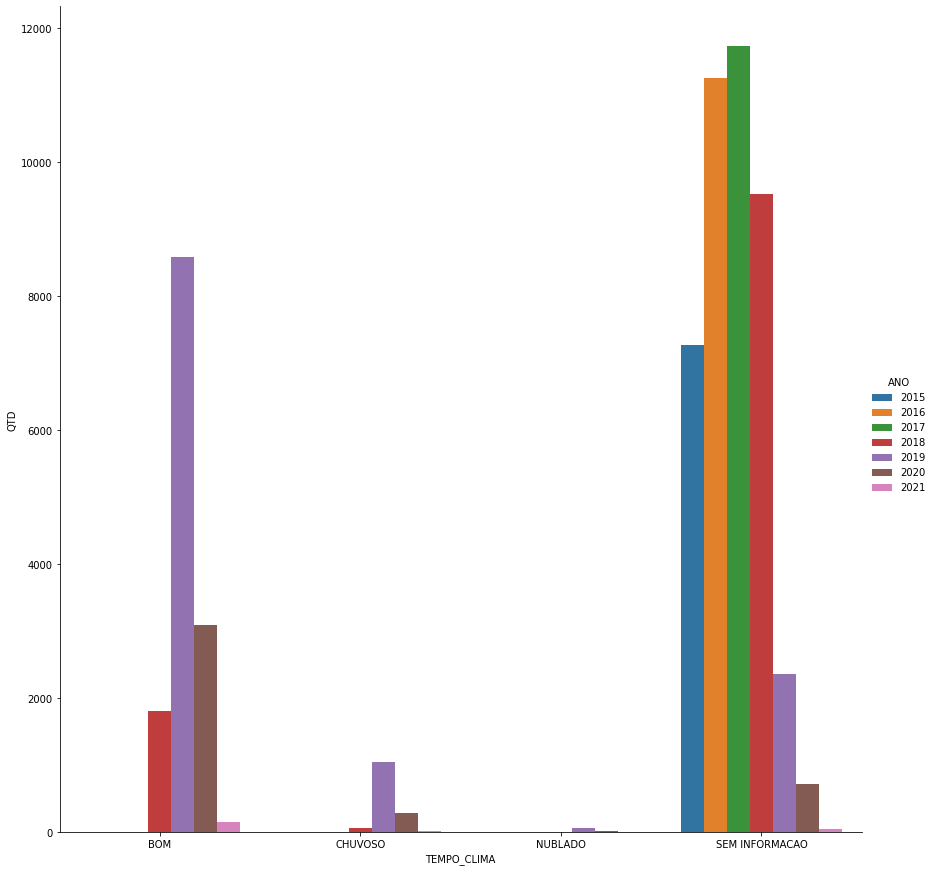

In [63]:
sns.catplot(x="TEMPO_CLIMA", y="QTD", hue="ANO", kind="bar", data=dff,height=12)
#plt.figure(figsize=(15,8))
#ax = sns.barplot(x="TEMPO_CLIMA", y="QTD",order=["BOM","CHUVOSO","NUBLADO","SEM INFORMACAO"], data=dff)

- No gráfico acima, podemos notar que a informação relacionada a ***CLIMA*** tem um certo tempo no nosso DATASET em que ela passou a ser disponibilizada, de toda forma, apenas olhando o gráfico, notamos que, embora intuitivamente, acredita-se que em períodos de ***CHUVA/TEMPO RUIM*** ocorra mais acidentes, um clima ***BOM/NORMAL*** se mostrou ter mais resultados presentes.
- Certo, então a partir disso, vamos fazer uma analise sobre a ***NATUREZA DO ACIDENTE***, para verificarmos se, embora com essa diferença, nos dis que são mais ***CHUVOSOS***, possamos encontrar alguma caracteristicas relacionada a ela.

In [64]:
#Vamos analisar as possibilidades dos tipos de acidentes que aconteceram
acidentes['NATUREZA_ACIDENTE'].unique()

['SEM VITIMA', 'COM VITIMA', 'VITIMA FATAL', 'SEM INFORMACAO', 'ENTRADA E SAIDA', 'APOIO']
Categories (6, object): ['SEM VITIMA', 'COM VITIMA', 'VITIMA FATAL', 'SEM INFORMACAO',
                         'ENTRADA E SAIDA', 'APOIO']

In [65]:
#Vamos verificar quantos registros possuem esse DATASET antes de uma redução apenas para alguns parametros para analise
acidentes['NATUREZA_ACIDENTE'].count()

58008

In [66]:
#Optamos por manter apenas esses 3 valores nos tipos de ACIDENTES que aconteceram, e pegar o DATASET a partir de 2018, que é quando temos registros de TEMPO_CLIMA
dff = 0
dff = acidentes[acidentes['ANO'] >= 2018][['ANO','NATUREZA_ACIDENTE','TEMPO_CLIMA']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')

In [67]:
dff['NATUREZA_ACIDENTE'].unique()

array(['COM VITIMA', 'SEM VITIMA', 'VITIMA FATAL', 'OUTROS'], dtype=object)

In [68]:
#Embora tenhamos reduzido bastante o DATASET para essa ANALISE, aleḿ da redução de TIPOS DE ACIDENTES, como já explicado anteriormente,
#   esse DATASET para informações CLIMATICAS, possui um período >= 2018, onde começou a ser disponibilizado
dff['ANO'].count()

27743

In [69]:
dff['QTD'] = 1
dff = pd.DataFrame(dff.groupby(["ANO","NATUREZA_ACIDENTE","TEMPO_CLIMA"])['QTD'].count())
dff.reset_index(inplace=True)

In [70]:
dff['NATUREZA_ACIDENTE'].unique()

array(['COM VITIMA', 'OUTROS', 'SEM VITIMA', 'VITIMA FATAL'], dtype=object)

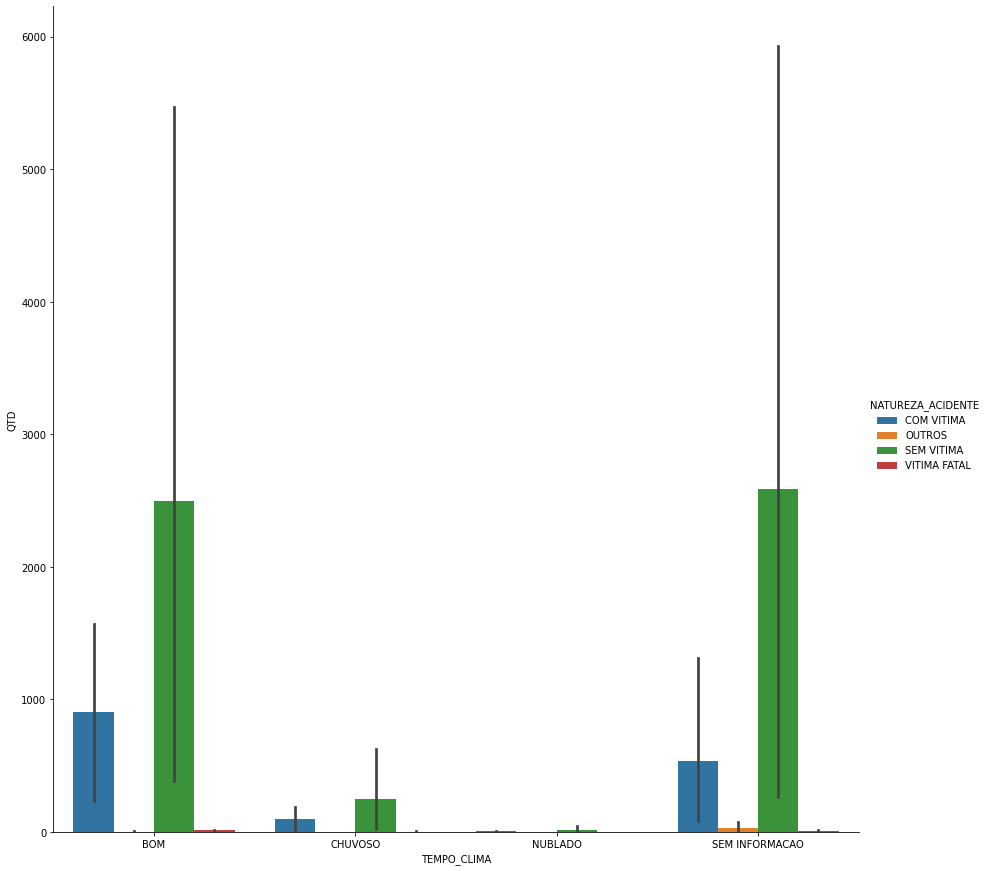

In [71]:
sns.catplot(x="TEMPO_CLIMA", y="QTD", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Bem, visualmente falando, o resultado não apresentou uma caracteristica expecifica entre dias ***CHUVOSOS*** e acidentes ***COM VITIMA***.
- Essa relação termina por ser ainda bastante expressiva com acidentes ***SEM VÍTIMAS***, que provavelmente é a classe dominante no DATASET

- E se tentarmos analisar com uma informação fora do nosso ***DATASET***. Sabemos que o período em que as ***CHUVAS*** são mais frequentes na região, é entre ***MARÇO - AGOSTO***, e que o período de mais ***SECA***, seria entre ***SETEMBRO - FEVEREIRO***. Considerando isso, será que conseguiriamos ver algum aumento nos tipos de acidentes que acontecem?
- Vamos analisar para um ano especifico, o ano de ***2019*** (escolhido por motivos de teste apenas)

In [72]:
dff = 0
dff = acidentes[acidentes['ANO'] == 2019][['MES','NATUREZA_ACIDENTE']]
dff['ESTACAO'] = dff['MES'].apply(lambda x: 'CHUVA' if x >= 3 and x < 9 else 'SECA')

dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["ESTACAO","NATUREZA_ACIDENTE"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

In [73]:
dff.head(5)

,ESTACAO,NATUREZA_ACIDENTE,QTD_ACIDENTES
0,CHUVA,APOIO,1
1,CHUVA,COM VITIMA,1056
2,CHUVA,ENTRADA E SAIDA,0
3,CHUVA,SEM INFORMACAO,1
4,CHUVA,SEM VITIMA,4672


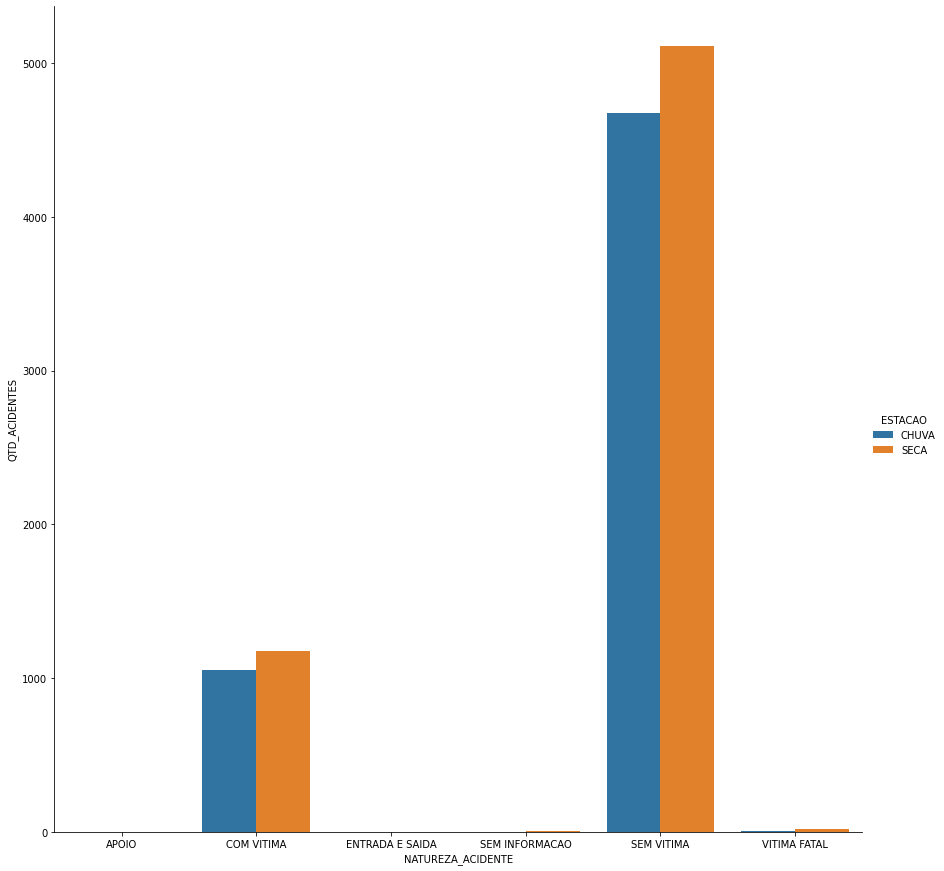

In [74]:
sns.catplot(x="NATUREZA_ACIDENTE", y="QTD_ACIDENTES", hue="ESTACAO", kind="bar", data=dff,height=12)

- Novamente, a relação ainda é bem próxima, o número de ocorrencias ***SEM VITIMA*** ainda é predominante, e no ***PERÍODO DE SECA*** ocorrem mais ***ACIDENTES***, independente dos tipos que estivermos analisando ***COM VITIMA ou  SEM VITIMA***

- Seguindo o fluxo de analise, ainda podemos olhar para essas informações de COM VITIMA, SEM VITIMA e VITIMA FATAL, relacionando outras informações do DATASET e vermos se encontramos algumas relações com:
- TIPO
- ACIDENTE_VERIFICADO
- SINALIZACAO
- CONDICAO_DA_VIA
- SITUACAO_PLACA
- VELOCIDADE_MAX_VIA
- MAO_DIRECAO
- PERIODO_DO_DIA
- BAIRRO

In [75]:
#Optamos por manter apenas esses 3 valores nos tipos de ACIDENTES que aconteceram
dff = 0
dff = acidentes[['NATUREZA_ACIDENTE','TIPO']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['TIPO'] = dff['TIPO'].apply(lambda x: x if x in ['ABALROAMENTO LONGITUDINAL','ABALROAMENTO TRANSVERSAL','ATROPELAMENTO','CHOQUE','CHOQUE OBJETO FIXO','CHOQUE VEICULO PARADO','COLISAO','COLISAO COM CICLISTA','COLISAO FRONTAL','COLISAO TRASEIRA','ENGAVETAMENTO','TOMBAMENTO'] else 'OUTROS')

dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","TIPO"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

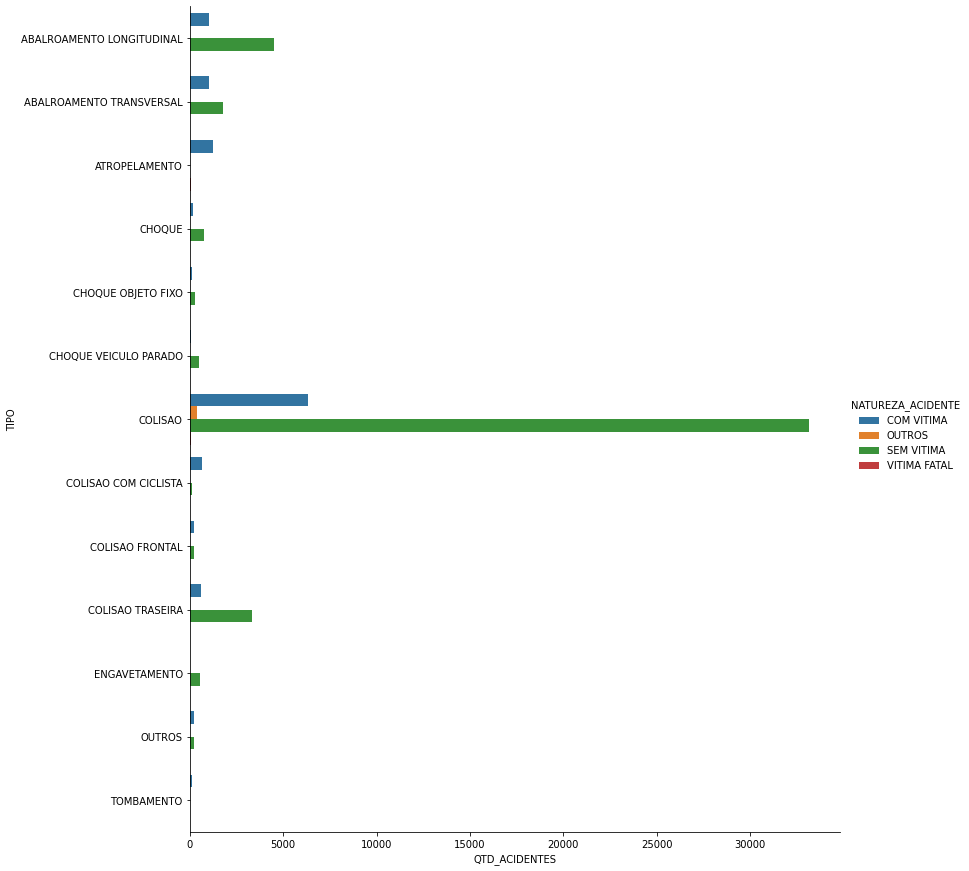

In [76]:
sns.catplot(x="QTD_ACIDENTES", y="TIPO", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Podemos ver algumas informações interessantes aqui. Casos envolvendo ***ATROPELAMENTOS, COLISÃO COM CICLISTA***, os acidentes causados terminam gerando VITIMAS, ***COLISÃO FRONTAL*** também geram COM VITIMAS, mas tem uma relação proxima com acidentes SEM VITIMA.
- As outras relações, variam, algumas possui um grande número de acidentes SEM VITIMA como ***ENGAVETAMENTO, COLISÃO***,  e acidentes do tipo ***ABALROAMENTO LONGITUDINAL e TRANSVERSAL*** já possuem ambas as CLASSES.

In [77]:
dff = acidentes[acidentes['ANO'] >= 2018][['NATUREZA_ACIDENTE','ACIDENTE_VERIFICADO']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['ACIDENTE_VERIFICADO'] = dff['ACIDENTE_VERIFICADO'].apply(lambda x: x if x in ['CRUZAMENTO','ESQUINA','LONGO DA VIA','PONTE','ROTATORIA','SEM INFORMACAO'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","ACIDENTE_VERIFICADO"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

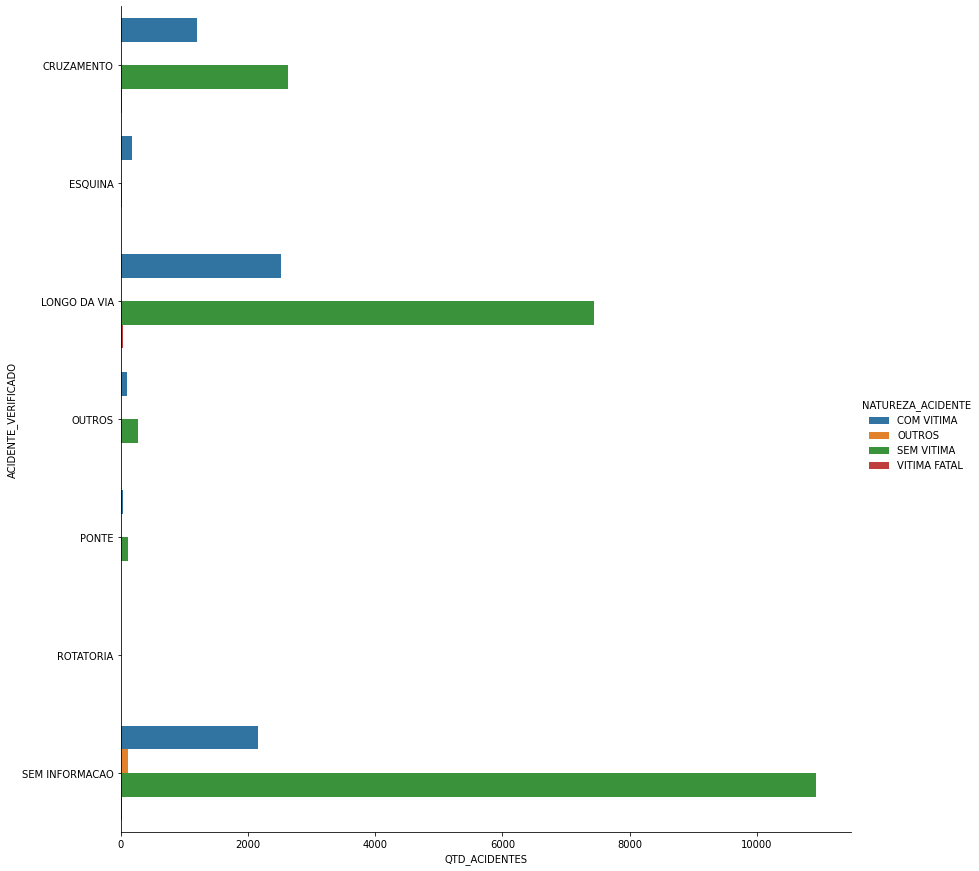

In [78]:
sns.catplot(x="QTD_ACIDENTES", y="ACIDENTE_VERIFICADO", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Analisando agora os locais onde foram registradas alguns dos acidentes, podemos notar que o caso mais SIGNIFICATIVO é o caso com a ***ESQUINA***, provavelmente pelo tipo do acidente que isso pode ter gerado, os casos estão mais associados ***COM VITIMA***
- Os outros locais onde os acidentes foram verificados, possui ambas as possibilidades ***SEM e COM VITIMAS****

In [79]:
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','SINALIZACAO']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","SINALIZACAO"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

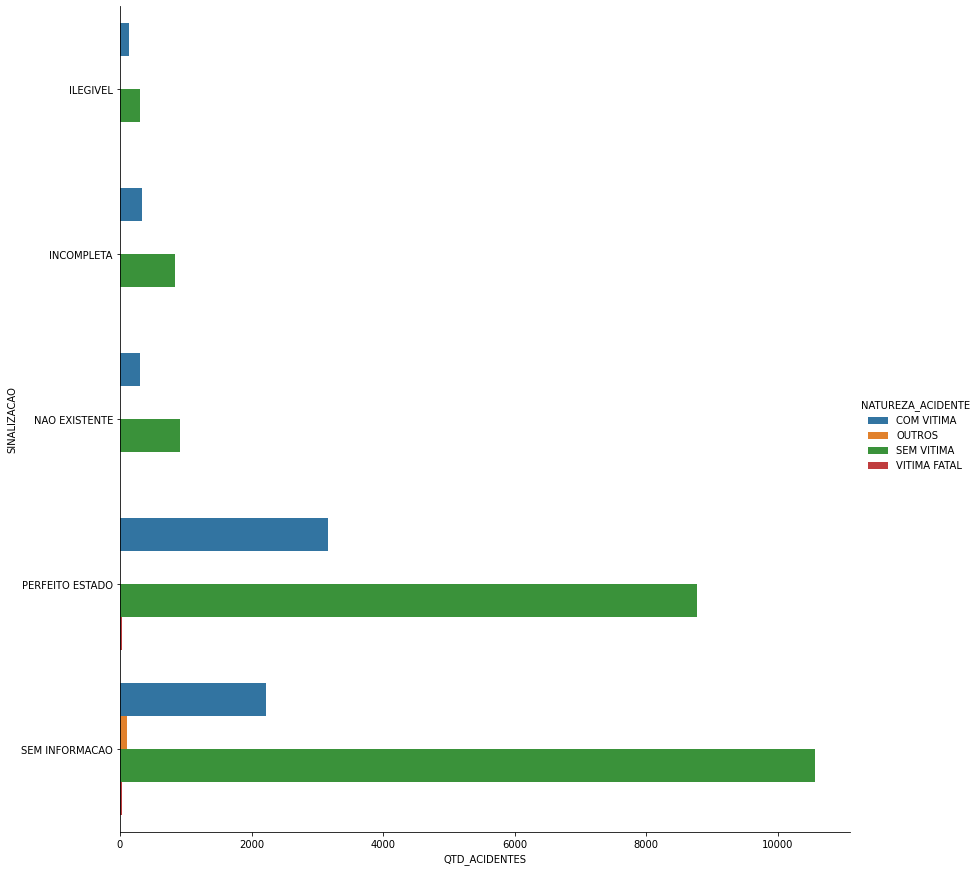

In [80]:
sns.catplot(x="QTD_ACIDENTES", y="SINALIZACAO", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Olhando para a SINALIZAÇÃO do local, novamente a relação ***SEM VITIMA***, ainda predomina, e com o ***PERFEITO ESTADO da SINALZIAÇÃO***, até agora, varios desses casos, estão acontecendo, talvez, seja interessante pensar que, a maioria dos acidentes acontecem, em locais e momentos em que as pessoas podem estar mais ***TRANQUILAS*** de que algo pode acontecer. Um dia sem ***CHUVA***, com uma boa ***SINALIZAÇÃO***, em um local ***BOM AO LONGO da VIA***, etc....

In [81]:
dff = 0
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','CONDICAO_VIA']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","CONDICAO_VIA"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

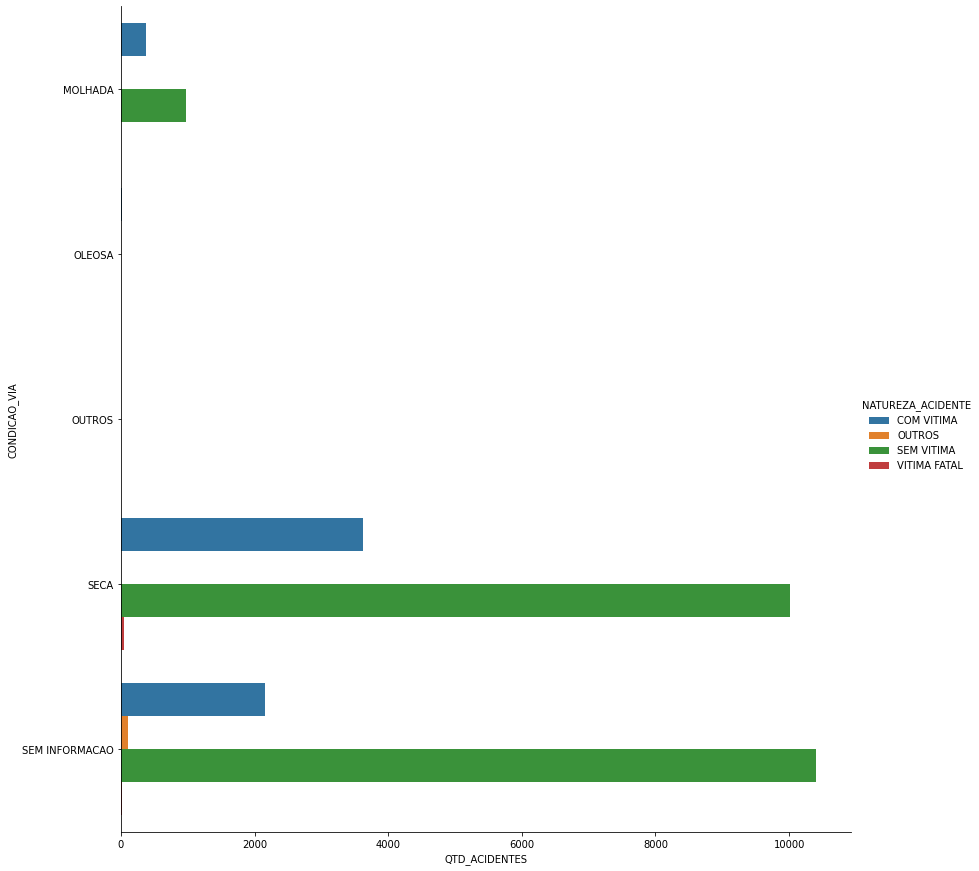

In [82]:
sns.catplot(x="QTD_ACIDENTES", y="CONDICAO_VIA", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Como já vimos anteriomente, os dias de CHUVA e até mesmo nos PERIODOS DE CHUVA, não indicaram uma relação que mostre uma GRANDE DIFERENÇA entre os casos ***COM VITIMA e SEM VITIMA***, agora, ocorreu o mesmo para uma via estando ***MOLHADA ou SECA***

In [83]:
dff = 0
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','SITUACAO_PLACA']]
dff['SITUACAO_PLACA'] = dff['SITUACAO_PLACA'].apply(lambda x: x if x in ['NAO HA PLACAS','PLACAS *PARE*','PLACAS PARE','R-6A','SEM INFORMACAO'] else 'OUTROS')
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","SITUACAO_PLACA"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

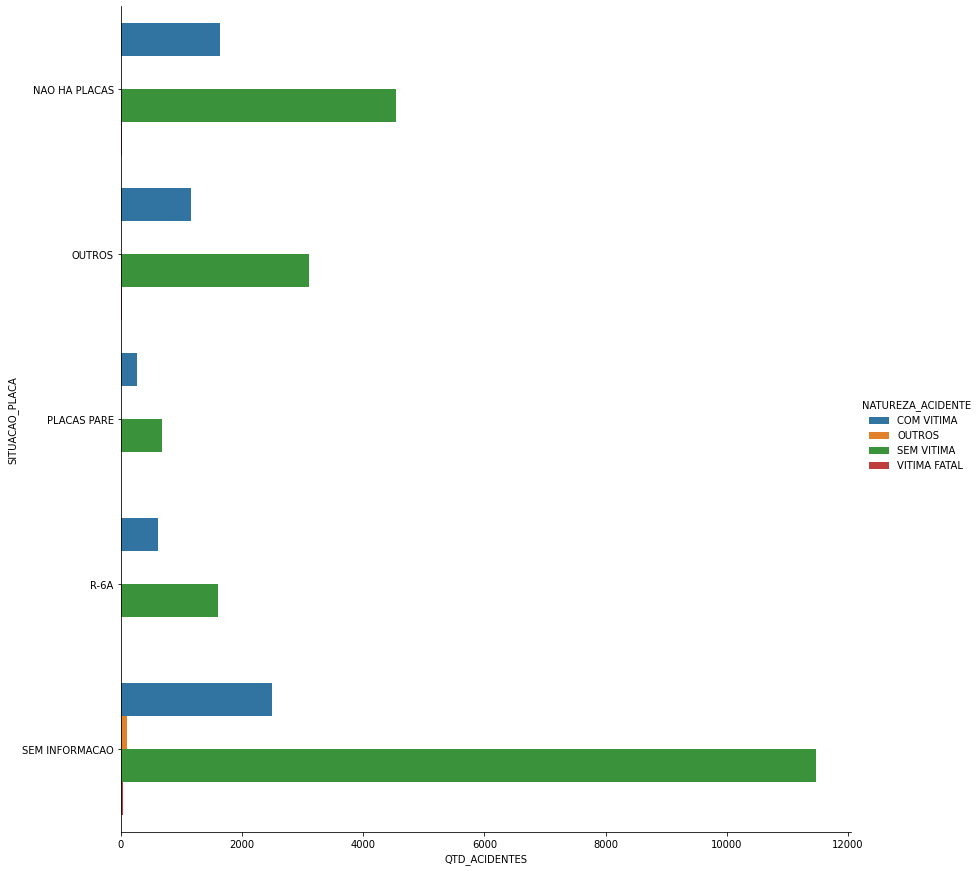

In [84]:
sns.catplot(x="QTD_ACIDENTES", y="SITUACAO_PLACA", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Interessante notar que das relações acima (tirando os casos onde não temos informação), os casos em que ***NAO HA PLACAS no local***, traz um grande número de acidentes comparado com as outras classes de PLACAS.

In [85]:
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','VELOCIDADE_MAX_VIA']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","VELOCIDADE_MAX_VIA"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

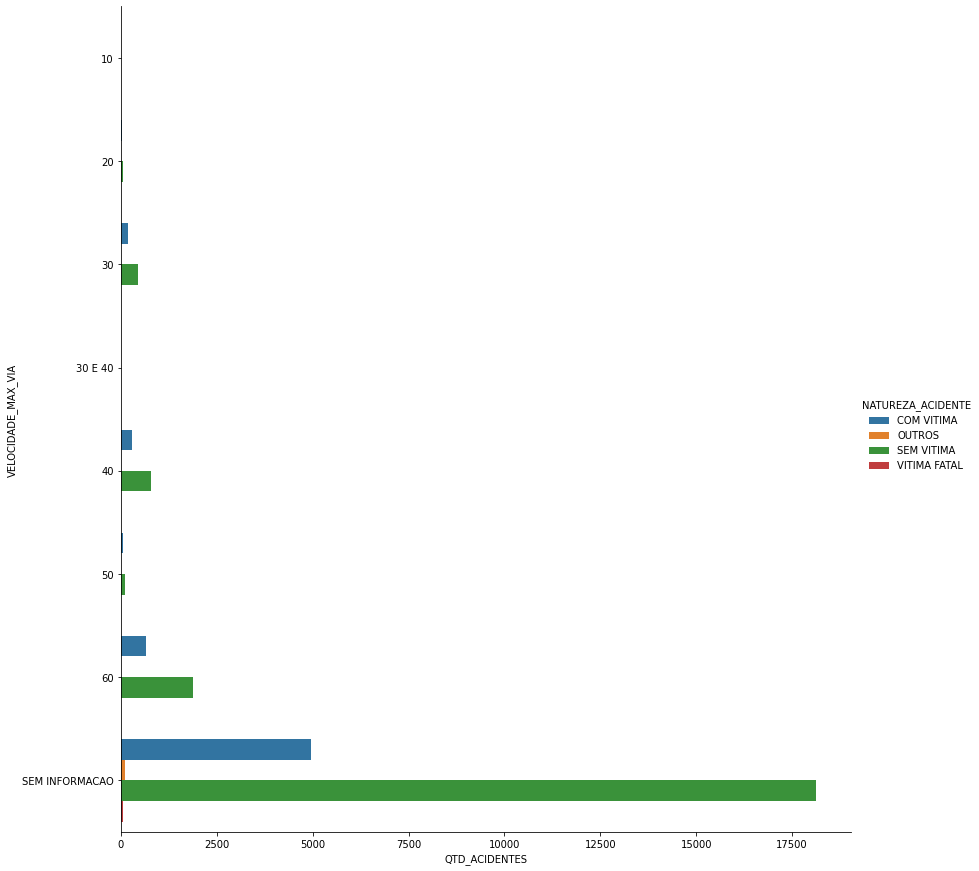

In [86]:
sns.catplot(x="QTD_ACIDENTES", y="VELOCIDADE_MAX_VIA", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Tentando analisar uma relação com a ***VELOCIDADE MAXIMA DA VIA***

In [87]:
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','MAO_DIRECAO']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","MAO_DIRECAO"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

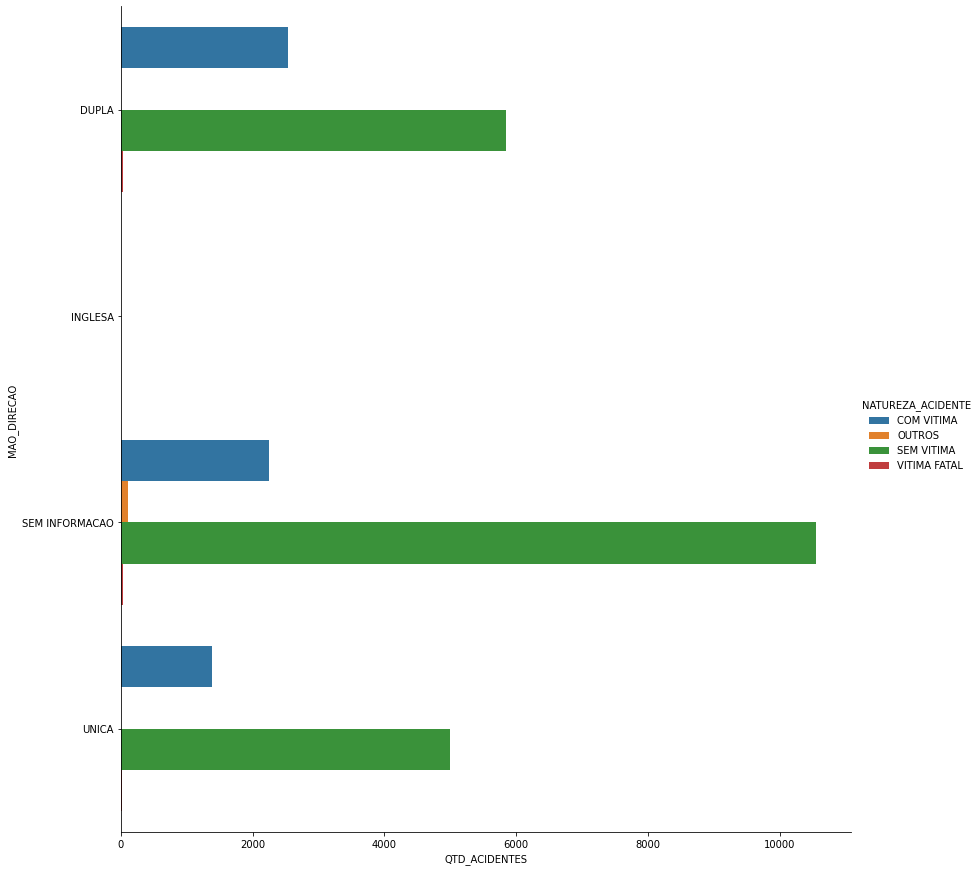

In [88]:
sns.catplot(x="QTD_ACIDENTES", y="MAO_DIRECAO", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Analisando a mão da via onde ocorreu o acidente, notamos que ocorre mais casos com a ***MAO DUPLA***, para ambos os casos ***SEM e COM VITIMA***

In [89]:
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','PERIODO_DO_DIA']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","PERIODO_DO_DIA"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

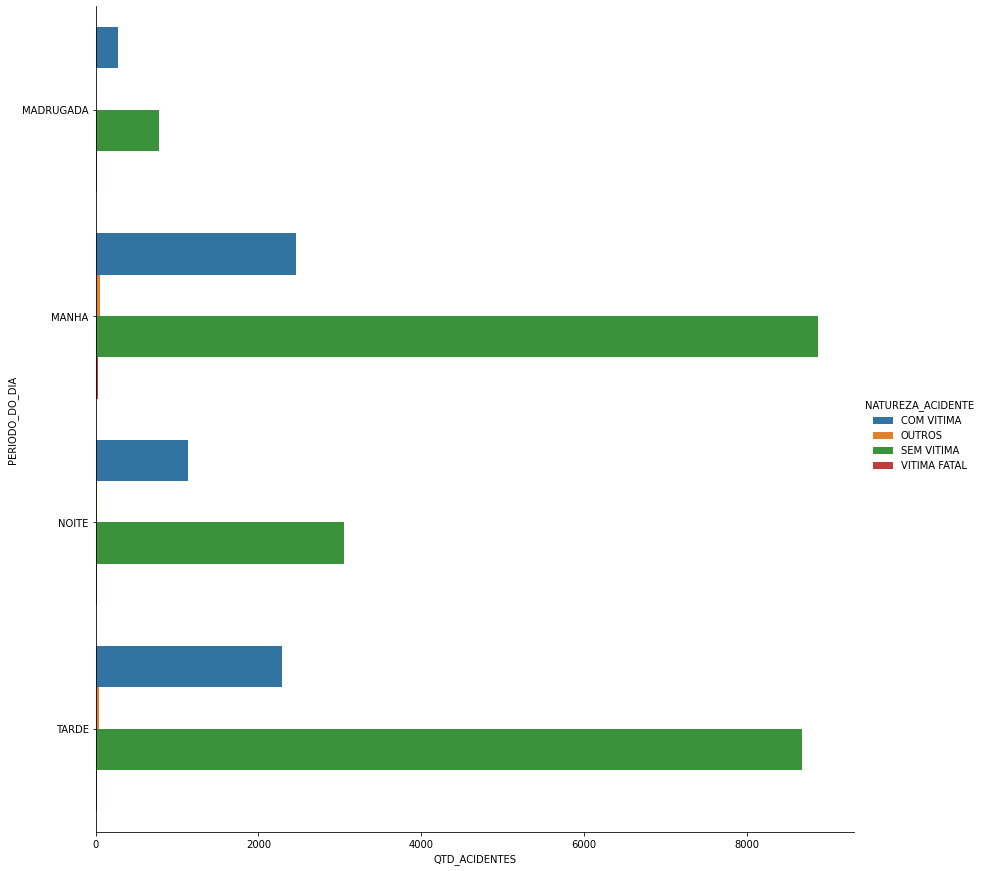

In [90]:
sns.catplot(x="QTD_ACIDENTES", y="PERIODO_DO_DIA", hue="NATUREZA_ACIDENTE", kind="bar", data=dff,height=12)

- Analisando a distribuição de acidentes ***COM e SEM VITIMA*** a partir dos horários, notamos que os periodos da ***MANHA e DA TARDE*** ocorrem mais ACIDENTES, e há uma redução no número de ocorrencias com a chegada da ***NOITE e MADRUGA***
- E se adicionarmos mais uma analise com o ***PERIODO DO DIA***

In [91]:
dff = acidentes[acidentes["ANO"] >= 2018][['DIA_DA_SEMANA','PERIODO_DO_DIA']]
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["DIA_DA_SEMANA","PERIODO_DO_DIA"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

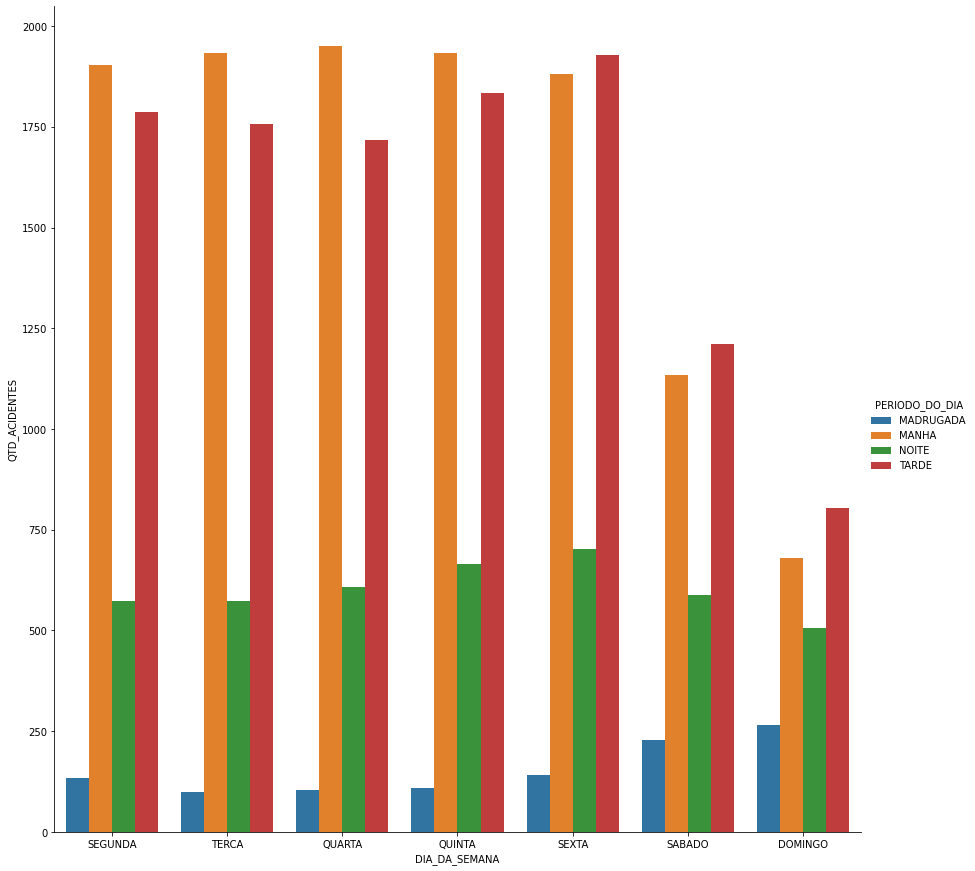

In [92]:
sns.catplot(x="DIA_DA_SEMANA", y="QTD_ACIDENTES", hue="PERIODO_DO_DIA", kind="bar", data=dff, order=["SEGUNDA", "TERCA","QUARTA","QUINTA","SEXTA","SABADO","DOMINGO"] ,height=12)

- Olhando a relação entre ***PERIODO DO DIA e o DIA DA SEMANA*** em que ocorre os acidentes, notamos ***DOIS*** comportamentos interessantes


1.   Independente do ***DIA***, os ***PERIODOS*** da ***MANHA e TARDE*** sempre ocorrem mais acidentes, muito provavelmente pelo número de *CARROS, MOTOS, BICICLETAS, ONNIBUS e até mesmo a circulação de pessoas* ser maior devido a horários de comercios, locais de lazer e trabalho.
2.   O segundo comportamento, é que, durante a ***SEMANA***, até pelos motivos citados no item 1, o número de ACIDENTES é MAIOR, e aos ***FINAIS DE SEMANA***, ele diminui, porém, nos finais de semana, ao mesmo tempo que o ***NUMERO DE ACIDENTES DURANTE A MANHA E TARDE*** diminuem, o ***NUMERO DE ACIDENTES NA MADRUGADA***, embora não na mesma proporção, ***TERMINAM AUMENTANDO***.



In [94]:
dff = acidentes[acidentes["ANO"] >= 2018][['NATUREZA_ACIDENTE','BAIRRO']]
dff['NATUREZA_ACIDENTE'] = dff['NATUREZA_ACIDENTE'].apply(lambda x: x if x in ['COM VITIMA','SEM VITIMA','VITIMA FATAL'] else 'OUTROS')
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["NATUREZA_ACIDENTE","BAIRRO"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

In [95]:
hue_order = ['SEM VITIMA', 'COM VITIMA', 'VITIMA FATAL','OUTROS']

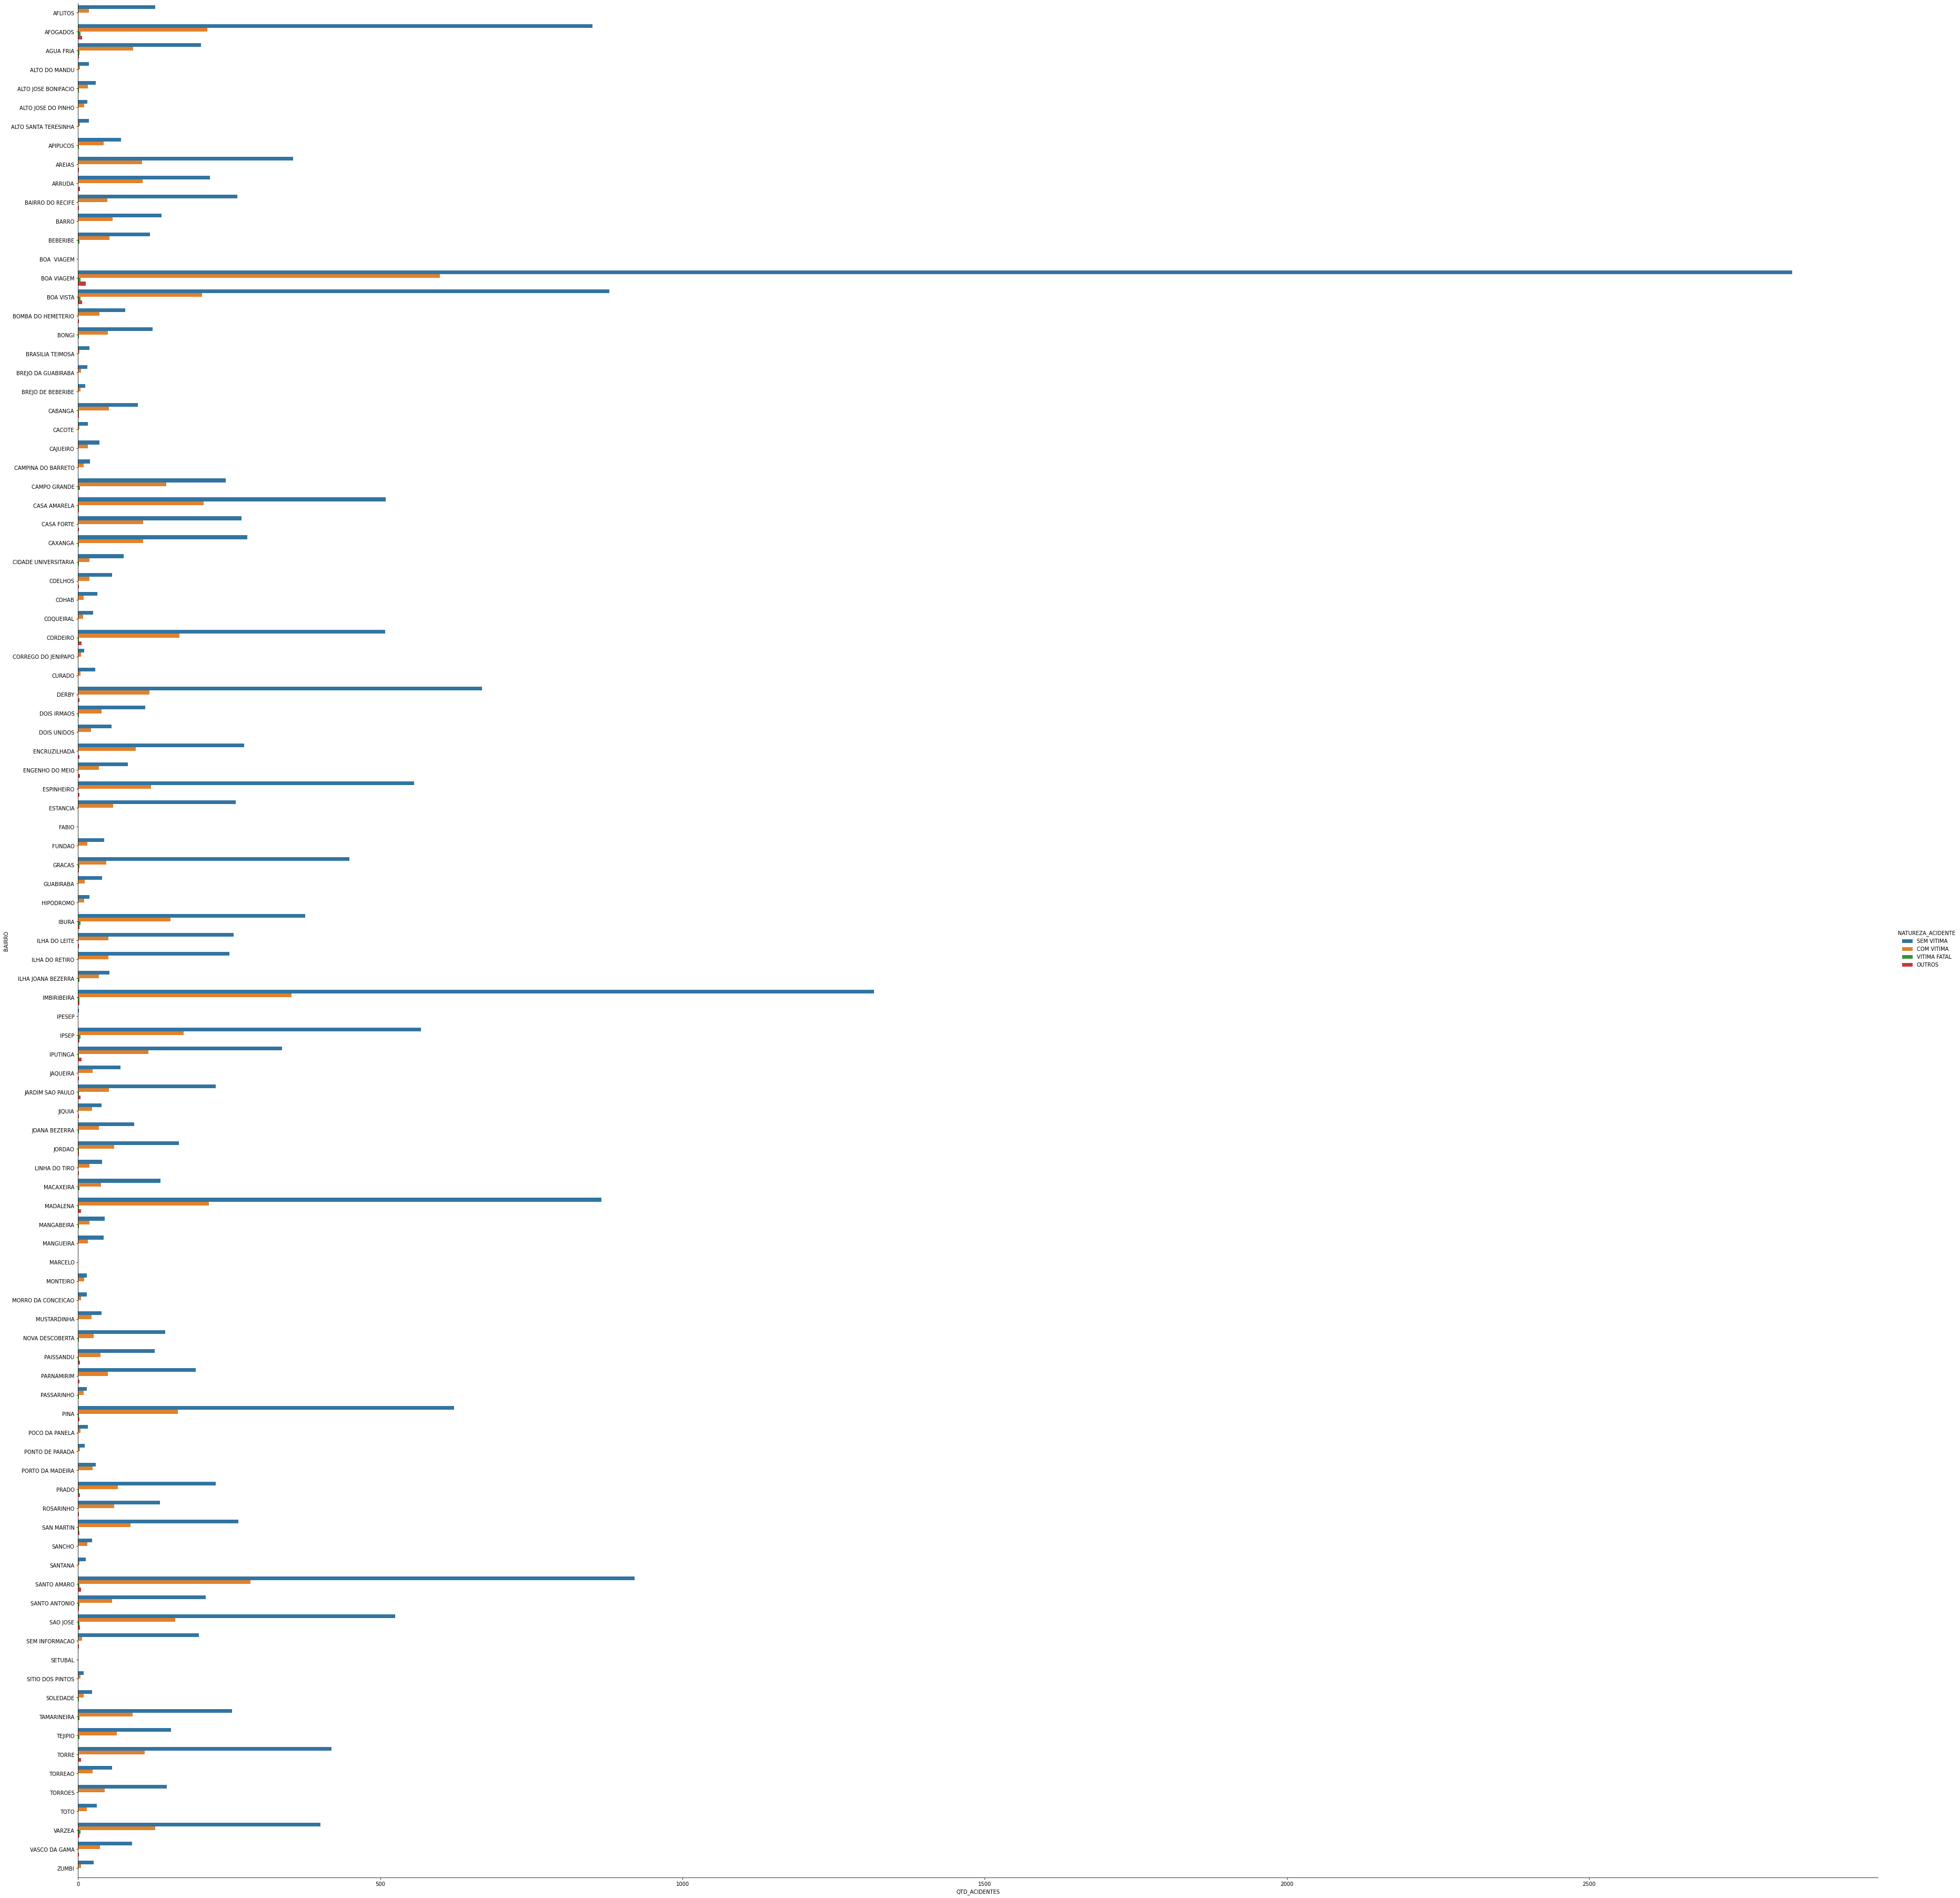

In [96]:
sns.catplot(x="QTD_ACIDENTES", y="BAIRRO", hue="NATUREZA_ACIDENTE", kind="bar",hue_order = hue_order ,data=dff, height=50)

- Os gráficos acima nos ajudam a perceber que essas informações não diferenciam (salvo alguns poucos casos) tanto as naturezas do acidente ***SEM VITIMA, COM VITIMA, VITIMA FATAL***

- Vamos buscar então entender melhor os dados tentando realizar alguns ***TESTES DE HIPOTESES***, tentando analisar algumas diferenças entre ***BAIRROS*** e as ***OCORRENCIAS DE ACIDENTES/TIPOS DE ACIDENTES***, assim como alguns ***MESES*** especificos

## Teste de Hipotese

**1 HIPOTESE:**
- Hipotese NULA: Distribuições são Normais
- Hipotese ALTERNATIVA: Distribuições diferentes

- Houve diferença entre o ano de 2019 para 2020 na quantidade de acidentes que ocorreram?

In [97]:
dff = acidentes[(acidentes['ANO'] >= 2015) & (acidentes['ANO'] < 2021)][['ANO','MES']]
dff['QTD_ACIDENTES'] = 1
dff = pd.DataFrame(dff.groupby(["ANO","MES"])['QTD_ACIDENTES'].count())
dff.reset_index(inplace=True)

In [98]:
dff.head(5)

,ANO,MES,QTD_ACIDENTES
0,2015,6,976
1,2015,7,1034
2,2015,8,1048
3,2015,9,1036
4,2015,10,1079


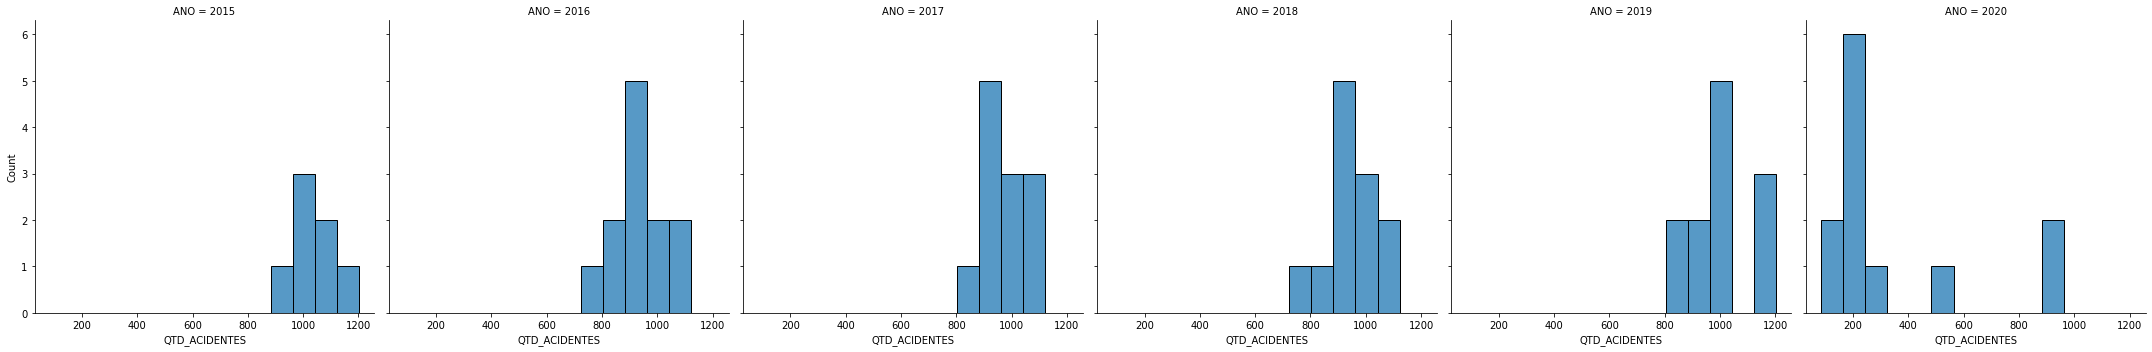

In [99]:
sns.displot(dff, x="QTD_ACIDENTES", col="ANO", multiple="dodge")

> Olhando rapidamento o ***PLOT*** dessas distribuições, notamos (como já mencionado em momentos anteriores), que ao longo dos anos, as distribuições em relação aos ***ACIDENTES*** que ocorreram são parecidas. Porém, em ***2020***, essa distribuição começa a ficar um pouco diferente

>Vamos analisar, antes de testarmos 2019 - 2020, se os anos que temos no nosso DATASET se comportam como uma DISTRIBUIÇÃO NORMAL. 




In [100]:
stats.shapiro(dff[dff['ANO'] == 2015]['QTD_ACIDENTES'])

(0.9611838459968567, 0.8288249969482422)

In [101]:
stats.shapiro(dff[dff['ANO'] == 2016]['QTD_ACIDENTES'])

(0.9417998194694519, 0.5217353105545044)

In [102]:
stats.shapiro(dff[dff['ANO'] == 2017]['QTD_ACIDENTES'])

(0.9213763475418091, 0.29751822352409363)

In [103]:
stats.shapiro(dff[dff['ANO'] == 2018]['QTD_ACIDENTES'])

(0.9426347613334656, 0.5329408049583435)

In [104]:
stats.shapiro(dff[dff['ANO'] == 2019]['QTD_ACIDENTES'])

(0.9585101008415222, 0.762366771697998)

In [105]:
stats.shapiro(dff[dff['ANO'] == 2020]['QTD_ACIDENTES'])

(0.7297052145004272, 0.001653975690715015)

> Em gráficos anteriores foi possivel visualizarmos a diferença entre os ***ANOS*** e o impacto que ocorreu nas ocorrencias de ***ACIDENTES*** durante a pandemia, os valores de P-Value, mostram que de ***2015 ATÉ 2019*** segue uma ***DISTRIBUIÇÃO NORMAL*** dos dados, porém, em ***2020*** nao, essa distribuição já muda de forma, e como o valor mostrado no P-VALUE, que é abaixo de 0.05, rejeitamos a ideia de ser uma ***DISTRIBUIÇÃO NORMAL***

> Utilizando então o ***Mann-Whitney U test***, verificamos, qual o valor da diferença entre essas duas distribuições ***2019 e 2020***

In [106]:
stats.mannwhitneyu(dff[dff['ANO'] == 2019]['QTD_ACIDENTES'],dff[dff['ANO'] == 2020]['QTD_ACIDENTES'])

MannwhitneyuResult(statistic=7.0, pvalue=9.808073685327135e-05)

> Temos então, que o P-Value é bem menor que 0.05 ***resultado foi de 0,000098080736***

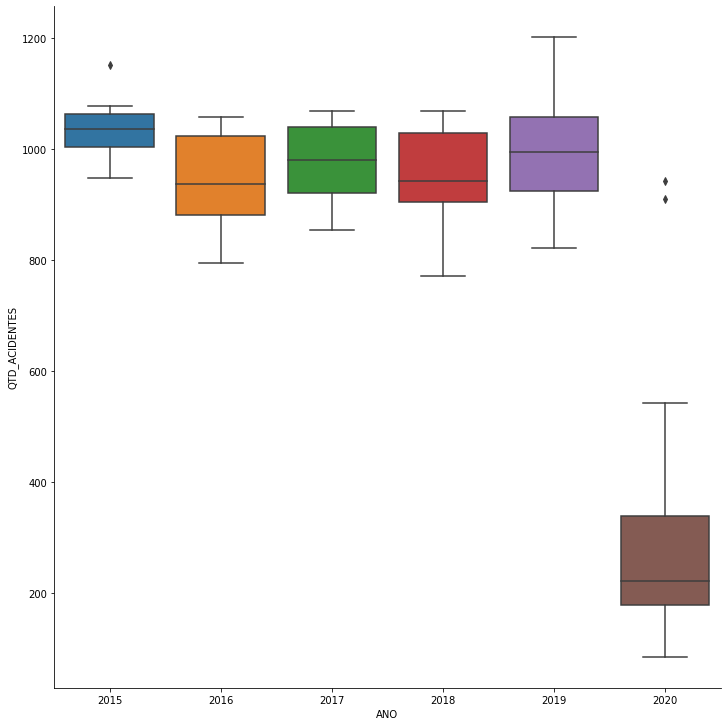

In [107]:
sns.catplot(x="ANO", y="QTD_ACIDENTES", kind="box", data=dff,height=10)

> Neste ***PLOT***, podemos visualizar, o quão é discrepante a disferença entre os anos analisados ***2019 - 2020***, e embora não tenha sido testado com o método anterior, tudo indica que haveria uma diferença entre as distribuições de qualquer ANO testado com ***2020***.

2 HIPOTESE:


Hipotese NULA: Distribuições são Normais

Hipotese ALTERNATIVA: Distribuições diferentes

Para o ano de 2020, com a pandemia, locais NOBRES de RECIFE, mantivem um número maior de ACIDENTES do que bairros mais HUMILDES?

In [276]:
df_bairro = acidentes[acidentes['ANO'] == 2020]
df_bairro.head(2)

,DATA,HORA,NATUREZA_ACIDENTE,SITUACAO,BAIRRO,ENDERECO,COMPLEMENTO,BAIRRO_CRUZAMENTO,TIPO,DESCRICAO,AUTO,MOTO,CICLOM,CICLISTA,PEDESTRE,ONIBUS,CAMINHAO,VIATURA,OUTROS,VITIMAS,VITIMASFATAIS,ACIDENTE_VERIFICADO,TEMPO_CLIMA,SITUACAO_SEMAFORO,SINALIZACAO,CONDICAO_VIA,CONSERVACAO_VIA,PONTO_CONTROLE,SITUACAO_PLACA,VELOCIDADE_MAX_VIA,MAO_DIRECAO,DIVISAO_VIA1,PERIODO_DO_DIA,DIA_DA_SEMANA,ANO,MES,QTD_ACIDENTES
53767,2020-01-01,0,SEM VITIMA,CANCELADA,AGUA FRIA,RUA SAO SEBASTIAO,EM FRENTE A IGREJA UNIVERSAL,AGUA FRIA,COLISAO,COLISAO ENTRE DOIS AUTOS S/V,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,MADRUGADA,QUARTA,2020,1,1
53768,2020-01-01,1,SEM VITIMA,FINALIZADA,CORDEIRO,AV CAXANGA,SEM INFORMACAO,CORDEIRO,ABALROAMENTO LONGITUDINAL,COLISAO ENTRE DOIS AUTOS S/V,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CRUZAMENTO,BOM,SEM DEFEITO,PERFEITO ESTADO,SECA,PERFEITO ESTADO,FAIXA DE PEDESTRE,SEM INFORMACAO,60,DUPLA,CANTEIRO CENTRAL,MADRUGADA,QUARTA,2020,1,1


In [277]:
df_bairro['QTD_ACIDENTES'] = 1
df_bairro = pd.DataFrame(df_bairro.groupby(["MES","BAIRRO"])['QTD_ACIDENTES'].count())

df_bairro.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> Na Wikpeddia, o ALTO JOSE BONIFACIO possui um dos menores valores de Renda Media por Domicilio

In [279]:
df_p = df_bairro[df_bairro['BAIRRO'] == 'ALTO JOSE BONIFACIO'][['MES','QTD_ACIDENTES']] 

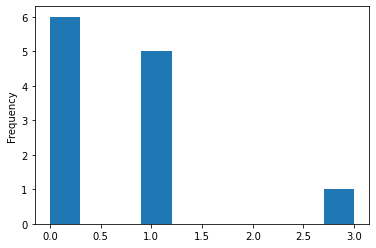

In [281]:
df_p['QTD_ACIDENTES'].plot(kind='hist')

> Realizando um teste para verificar sua distribuição, vemos que a distribuição não se apresenta como uma NORMAL


In [282]:
stats.shapiro(df['QTD_ACIDENTES'])

(0.7160041928291321, 0.001207017689011991)

> Também na Wikipedia, CASA FORTE possui um dos maiores valores de Renda Media por Domicilio

In [287]:
df_r = df_bairro[df_bairro['BAIRRO'] == 'CASA FORTE'][['MES','QTD_ACIDENTES']]

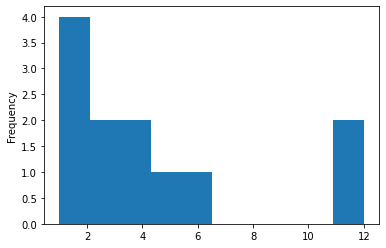

In [288]:
df_r['QTD_ACIDENTES'].plot(kind='hist')

> Realizando um teste para verificar sua distribuição, vemos que a distribuição não se apresenta como uma NORMAL se consideramos o limir como 0.05, 

> Porém, ainda possui um valor maior que o do ALTO JOSE BONIFACIO, o que pode indicar essa taxa maior de fluxo de veículos,e que pode causar um maior número de acidentes.

In [290]:
stats.shapiro(df_r['QTD_ACIDENTES'])

(0.8285647034645081, 0.020161276683211327)

In [291]:
stats.mannwhitneyu(df_p,df_r)

MannwhitneyuResult(statistic=27.5, pvalue=0.005304899143566431)

Temos então, que o P-Value é bem menor que 0.05 resultado foi de 0.00530

# DATASET's Auxiliares que iremos utilizar para compor mais algumas informações ao nosso DATASET PRINCIPAL (ACIDENTES)

### Dataset de Comercios

In [119]:
comercios = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/comercios_2015_2021_trimestre.csv",delimiter = ';')

In [120]:
#Visualizando o DATASET
comercios.head() 

,ANO,TRIMESTRE,RAZAO_SOCIAL,NOME_FANTASIA,CNPJ,PORTE,DATA_INICIO_OPERACAO,SITUACAO,ATIVIDADE,CEP,UF,LOCALIDADE,BAIRRO,LOGRADOURO,DATA_GERACAO_CERTIFICADO,DATA_VALIDADE_CERTIFICADO,CODIGO_CERTIFICADO,CODIGO_DESCRICAO_CNAE,NATUREZA_JURIDICA
0,2021,1,"MELLO, RIBEIRO & MELLO LTDA",China in Box Rosarinho,00.874.830/0001-48,EMPRESA DE PEQUENO PORTE,25/10/1995,Em Operação,"Restaurante, Cafeteria, Bar e Similares",52041-305,PE,Recife,Rosarinho,Amaro Coutinho,23/03/2020 09:27,23/03/2022 09:27,00.874.830/0001-48,"5611-2/03 - LANCHONETES, CASAS DE CHÁ, DE SUCO...",Sociedade Empresária Limitada
1,2021,1,M DAS DORES DE SOUZA CHURRASCARIA,Restaurante e Churrascaria da Dodora,01.219.705/0001-67,MICROEMPRESA,28/05/1996,Em Operação,"Restaurante, Cafeteria, Bar e Similares",55690-000,PE,Barra de Guabiraba,-,Av. Eneias Texeira de Carvalho n 101,01/04/2019 10:44,01/04/2021 10:44,01.219.705/0001-67,5611-2/02 - BARES E OUTROS ESTABELECIMENTOS ES...,Empresário Individual
2,2021,1,POUSADA DO AMPARO - EIRELI,POUSADA DO AMPARO,01.790.381/0001-12,MICROEMPRESA,06/04/1997,Em Operação,"Restaurante, Cafeteria, Bar e Similares",53025-080,PE,Olinda,Amparo,do Amparo,11/06/2020 08:17,11/06/2022 08:17,01.790.381/0001-12,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
3,2021,1,NEZ BISTRO COMERCIO DE BEBIDAS E RESTAURANTE E...,NEZ BISTRO,02.217.561/0001-72,MICROEMPRESA,30/10/1997,Em Operação,"Restaurante, Cafeteria, Bar e Similares",52061-420,PE,Recife,Casa Forte,de Casa Forte,16/07/2020 12:44,16/07/2022 12:44,02.217.561/0001-72,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
4,2021,1,ATLANTICA HOTELS INTERNATIONAL BRASIL LTDA,RESTAURANTE NABUCO,02.223.966/0036-43,DEMAIS,03/10/2003,Em Operação,"Restaurante, Cafeteria, Bar e Similares",51111-000,PE,Recife,Boa Viagem,Boa Viagem,19/12/2019 07:58,19/12/2021 07:58,02.223.966/0036-43,5611-2/01 - RESTAURANTES E SIMILARES,Sociedade Empresária Limitada


In [121]:
comercios.dtypes

ANO                           int64
TRIMESTRE                     int64
RAZAO_SOCIAL                 object
NOME_FANTASIA                object
CNPJ                         object
PORTE                        object
DATA_INICIO_OPERACAO         object
SITUACAO                     object
ATIVIDADE                    object
CEP                          object
UF                           object
LOCALIDADE                   object
BAIRRO                       object
LOGRADOURO                   object
DATA_GERACAO_CERTIFICADO     object
DATA_VALIDADE_CERTIFICADO    object
CODIGO_CERTIFICADO           object
CODIGO_DESCRICAO_CNAE        object
NATUREZA_JURIDICA            object
dtype: object

In [122]:
#Como as atividades de forma geral não diferenciam tanto, pode assumir que os resultados desse dataset seriam lugares como esses
comercios['ATIVIDADE'].unique()

array(['Restaurante, Cafeteria, Bar e Similares',
       'Restaurantes, Cafeterias e Bares'], dtype=object)

In [123]:
excluidos = comercios[['ANO','ATIVIDADE','DATA_INICIO_OPERACAO','TRIMESTRE','RAZAO_SOCIAL','NOME_FANTASIA','CNPJ','PORTE','SITUACAO','UF','DATA_GERACAO_CERTIFICADO','DATA_VALIDADE_CERTIFICADO','CODIGO_CERTIFICADO',	'CODIGO_DESCRICAO_CNAE',	'NATUREZA_JURIDICA']]
excluidos.head()

,ANO,ATIVIDADE,DATA_INICIO_OPERACAO,TRIMESTRE,RAZAO_SOCIAL,NOME_FANTASIA,CNPJ,PORTE,SITUACAO,UF,DATA_GERACAO_CERTIFICADO,DATA_VALIDADE_CERTIFICADO,CODIGO_CERTIFICADO,CODIGO_DESCRICAO_CNAE,NATUREZA_JURIDICA
0,2021,"Restaurante, Cafeteria, Bar e Similares",25/10/1995,1,"MELLO, RIBEIRO & MELLO LTDA",China in Box Rosarinho,00.874.830/0001-48,EMPRESA DE PEQUENO PORTE,Em Operação,PE,23/03/2020 09:27,23/03/2022 09:27,00.874.830/0001-48,"5611-2/03 - LANCHONETES, CASAS DE CHÁ, DE SUCO...",Sociedade Empresária Limitada
1,2021,"Restaurante, Cafeteria, Bar e Similares",28/05/1996,1,M DAS DORES DE SOUZA CHURRASCARIA,Restaurante e Churrascaria da Dodora,01.219.705/0001-67,MICROEMPRESA,Em Operação,PE,01/04/2019 10:44,01/04/2021 10:44,01.219.705/0001-67,5611-2/02 - BARES E OUTROS ESTABELECIMENTOS ES...,Empresário Individual
2,2021,"Restaurante, Cafeteria, Bar e Similares",06/04/1997,1,POUSADA DO AMPARO - EIRELI,POUSADA DO AMPARO,01.790.381/0001-12,MICROEMPRESA,Em Operação,PE,11/06/2020 08:17,11/06/2022 08:17,01.790.381/0001-12,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
3,2021,"Restaurante, Cafeteria, Bar e Similares",30/10/1997,1,NEZ BISTRO COMERCIO DE BEBIDAS E RESTAURANTE E...,NEZ BISTRO,02.217.561/0001-72,MICROEMPRESA,Em Operação,PE,16/07/2020 12:44,16/07/2022 12:44,02.217.561/0001-72,5611-2/01 - RESTAURANTES E SIMILARES,Empresa Individual de Responsabilidade Limitad...
4,2021,"Restaurante, Cafeteria, Bar e Similares",03/10/2003,1,ATLANTICA HOTELS INTERNATIONAL BRASIL LTDA,RESTAURANTE NABUCO,02.223.966/0036-43,DEMAIS,Em Operação,PE,19/12/2019 07:58,19/12/2021 07:58,02.223.966/0036-43,5611-2/01 - RESTAURANTES E SIMILARES,Sociedade Empresária Limitada


In [124]:
comercios = comercios.drop(['TRIMESTRE','DATA_INICIO_OPERACAO','ATIVIDADE','RAZAO_SOCIAL','NOME_FANTASIA','CNPJ','PORTE','SITUACAO','UF','DATA_GERACAO_CERTIFICADO','DATA_VALIDADE_CERTIFICADO','CODIGO_CERTIFICADO',	'CODIGO_DESCRICAO_CNAE',	'NATUREZA_JURIDICA'], axis=1)

In [125]:
comercios.head()

,ANO,CEP,LOCALIDADE,BAIRRO,LOGRADOURO
0,2021,52041-305,Recife,Rosarinho,Amaro Coutinho
1,2021,55690-000,Barra de Guabiraba,-,Av. Eneias Texeira de Carvalho n 101
2,2021,53025-080,Olinda,Amparo,do Amparo
3,2021,52061-420,Recife,Casa Forte,de Casa Forte
4,2021,51111-000,Recife,Boa Viagem,Boa Viagem


In [126]:
#comercios['DATA_INICIO_OPERACAO'] = pd.to_datetime(comercios['DATA_INICIO_OPERACAO'], format='%Y-%m-%d', errors='ignore')
comercios = comercios.astype({'CEP':'category',	'LOCALIDADE':'category',	'BAIRRO':'category', 'LOGRADOURO':'category'})

In [136]:
comercios['LOCALIDADE'] = comercios['LOCALIDADE'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
comercios['BAIRRO'] = comercios['BAIRRO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
comercios['LOGRADOURO'] = comercios['LOGRADOURO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
comercios['COMERCIO'] = 'RESTAURANTES, CAFETERIA , BARES E SIMILARES'
comercios['COMERCIO'] = comercios['COMERCIO'].str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')

Aqui conseguimos manter o ***ANO*** em que o comercio foi identificado, o ***CEP*** para mantermos informações sobre ***GEORREFERENCIAMENTO***, a ***LOCALIDADE, BAIRRO e LAGRADOURO*** para tentarmos 

In [140]:
comercios.head(5)

,ANO,CEP,LOCALIDADE,BAIRRO,LOGRADOURO,COMERCIO
0,2021,52041-305,RECIFE,ROSARINHO,AMARO COUTINHO,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
1,2021,55690-000,BARRA DE GUABIRABA,-,AV ENEIAS TEXEIRA DE CARVALHO N 101,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
2,2021,53025-080,OLINDA,AMPARO,DO AMPARO,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
3,2021,52061-420,RECIFE,CASA FORTE,DE CASA FORTE,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"
4,2021,51111-000,RECIFE,BOA VIAGEM,BOA VIAGEM,"RESTAURANTES, CAFETERIA , BARES E SIMILARES"


In [141]:
print(comercios.isnull().sum()/len(comercios))

ANO           0.0
CEP           0.0
LOCALIDADE    0.0
BAIRRO        0.0
LOGRADOURO    0.0
COMERCIO      0.0
dtype: float64


In [142]:
comercios.dtypes

ANO              int64
CEP           category
LOCALIDADE    category
BAIRRO        category
LOGRADOURO    category
COMERCIO      category
dtype: object

## Dataset de Equipamento de velocidade das vias

In [150]:
equipamento_velocidade_vias = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/equipamento_velocidade_vias_2016_2021.csv",delimiter = ';')

In [151]:
equipamento_velocidade_vias.head()

,ANO,EQUIPAMENTO,TIPO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,2016,5941,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130970,-34.916161
1,2016,5942,Lombada,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130647,-34.915886
2,2016,5943,Lombada,AV. BOA VIAGEM - TERCEIRO JARDIM,60 km/h,-8.107843,-34.888161
3,2016,5944,Lombada,"DEFRONTE A PCA. GOV. PAULO GUERRA, CABANGA - S...",60 km/h,-8.080121,-34.892187
4,2016,5945,Lombada,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT....",60 km/h,-8.080820,-34.891159


In [152]:
#Optamos por excluir essa coluna, pelo menos por enquanto, não tanto interesse em saber esse tipo de informação
excluidos = equipamento_velocidade_vias[['TIPO']]
excluidos['TIPO'].unique()

array(['Lombada', 'Fotossensor'], dtype=object)

In [153]:
equipamento_velocidade_vias = equipamento_velocidade_vias.drop(['TIPO'], axis=1)

In [154]:
equipamento_velocidade_vias = equipamento_velocidade_vias.astype({'ANO':'category',	'EQUIPAMENTO':'category',	'LOGRADOURO':'category',	'VELOCIDADE_VIA':'category', 'LATITUDE':'category','LONGITUDE':'category'})

In [155]:
equipamento_velocidade_vias.dtypes

ANO               category
EQUIPAMENTO       category
LOGRADOURO        category
VELOCIDADE_VIA    category
LATITUDE          category
LONGITUDE         category
dtype: object

In [156]:
print(equipamento_velocidade_vias.isnull().sum()/len(equipamento_velocidade_vias))

ANO               0.0
EQUIPAMENTO       0.0
LOGRADOURO        0.0
VELOCIDADE_VIA    0.0
LATITUDE          0.0
LONGITUDE         0.0
dtype: float64


In [157]:
equipamento_velocidade_vias.head(5)

,ANO,EQUIPAMENTO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,2016,5941,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130970,-34.916161
1,2016,5942,"AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...",60 km/h,-8.130647,-34.915886
2,2016,5943,AV. BOA VIAGEM - TERCEIRO JARDIM,60 km/h,-8.107843,-34.888161
3,2016,5944,"DEFRONTE A PCA. GOV. PAULO GUERRA, CABANGA - S...",60 km/h,-8.080121,-34.892187
4,2016,5945,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT....",60 km/h,-8.080820,-34.891159


In [158]:
#Aqui já estamos adiantando para ver os valores possiveis do EQUIPAMENTOS, mais a freente, tudo indica que conseguiremos unir essas informações com outro DATASET
equipamento_velocidade_vias['EQUIPAMENTO'].unique()

['5941', '5942', '5943', '5944', '5945', ..., 'FS028', 'FS029', 'FS030', 'FS033', 'FS037']
Length: 62
Categories (62, object): ['5941', '5942', '5943', '5944', ..., 'FS029', 'FS030', 'FS033', 'FS037']

In [159]:
equipamento_velocidade_vias['LOGRADOURO'] = equipamento_velocidade_vias['LOGRADOURO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
equipamento_velocidade_vias['EQUIPAMENTO'] = equipamento_velocidade_vias['EQUIPAMENTO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
equipamento_velocidade_vias['VELOCIDADE_VIA'] = equipamento_velocidade_vias['VELOCIDADE_VIA'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')

Nesse Dataset, selecionamos as informações de ***ANO***, que será muito importante para ***JOIN*** futuros entre as tabelas, assim como o ***CODIGO DO EQUIPAMENTO***, o LAGRADOURO, e optamos por manter também a VELOCIDA_VIA, que talvez possa nos ajudar conseguir melhorar esse tipo de informação em nosso DATASET, e a ***LATITUDE*** e ***LONGITUDE*** para mantermos informações de ***GEORREFENCIAMENTO***

In [160]:
equipamento_velocidade_vias.head(5)

,ANO,EQUIPAMENTO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,2016,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.130970,-34.916161
1,2016,5942,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.130647,-34.915886
2,2016,5943,AV BOA VIAGEM - TERCEIRO JARDIM,60 KM/H,-8.107843,-34.888161
3,2016,5944,"DEFRONTE A PCA GOV PAULO GUERRA, CABANGA - S...",60 KM/H,-8.080121,-34.892187
4,2016,5945,"APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT ...",60 KM/H,-8.080820,-34.891159


## Dataset de Multas

In [161]:
multas = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/relatorio_multas_2015_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
multas.head()

,DATAINFRACAO,HORAINFRACAO,DATAIMPLANTACAO,AGENTEEQUIPAMENTO,INFRACAO,DESCRICAOINFRACAO,AMPAROLEGAL,LOCALCOMETIMENTO
0,2015/10/26 00:00:00.000,08:42:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
1,2015/10/26 00:00:00.000,08:45:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5541,Estacionar o veículo em desacordo com as condi...,"Art. 181, Inc. XVII",AV PORTUGAL EM FRENTE AO IMOVEL N 89
2,2015/10/26 00:00:00.000,08:48:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5525,Estacionar o veículo na contramão de direção.,"Art. 181, Inc. XV",AV PORTUGAL EM FRENTE AO IMOVEL N 101
3,2015/10/26 00:00:00.000,08:55:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,5550,Estacionar o veículo em locais e horários proi...,"Art. 181, Inc. XVIII",RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124
4,2015/10/26 00:00:00.000,09:10:00,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,7366,Dirigir o veículo utilizando-se de telefone ce...,"Art. 252, Inc. VI",AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...


In [163]:
#Optamos por excluir as colunas que apresentam muita informação CATEGORICAS que até o momento, não aparenta ser tão interessante para podermos utiliza-lás
excluidos = multas[['DATAIMPLANTACAO', 'AGENTEEQUIPAMENTO',	'AMPAROLEGAL']]
excluidos.head()

,DATAIMPLANTACAO,AGENTEEQUIPAMENTO,AMPAROLEGAL
0,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVII"
1,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVII"
2,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XV"
3,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 181, Inc. XVIII"
4,2015/11/03 00:00:00.000,Código 6 - AUTOS NO TALÃO MANUAL,"Art. 252, Inc. VI"


In [164]:
multas = multas.drop(['DATAIMPLANTACAO', 'AGENTEEQUIPAMENTO',	'AMPAROLEGAL'], axis=1)

In [165]:
multas['DATAINFRACAO'] = pd.to_datetime(multas['DATAINFRACAO'], format='%Y-%m-%d', errors='ignore')
multas['HORAINFRACAO'] = pd.to_datetime(multas['HORAINFRACAO'], format='%H:%M:%S', errors = 'ignore')
multas = multas.astype({'INFRACAO':'category', 'DESCRICAOINFRACAO':'category','LOCALCOMETIMENTO':'category'})

In [166]:
multas.head(5)

,DATAINFRACAO,HORAINFRACAO,INFRACAO,DESCRICAOINFRACAO,LOCALCOMETIMENTO
0,2015-10-26,08:42:00,5541,Estacionar o veículo em desacordo com as condi...,AV PORTUGAL EM FRENTE AO IMOVEL N 89
1,2015-10-26,08:45:00,5541,Estacionar o veículo em desacordo com as condi...,AV PORTUGAL EM FRENTE AO IMOVEL N 89
2,2015-10-26,08:48:00,5525,Estacionar o veículo na contramão de direção.,AV PORTUGAL EM FRENTE AO IMOVEL N 101
3,2015-10-26,08:55:00,5550,Estacionar o veículo em locais e horários proi...,RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124
4,2015-10-26,09:10:00,7366,Dirigir o veículo utilizando-se de telefone ce...,AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...


In [167]:
multas.dtypes

DATAINFRACAO         datetime64[ns]
HORAINFRACAO                 object
INFRACAO                   category
DESCRICAOINFRACAO          category
LOCALCOMETIMENTO           category
dtype: object

In [168]:
print(multas.isnull().sum()/len(multas))

DATAINFRACAO         1.157818e-06
HORAINFRACAO         0.000000e+00
INFRACAO             5.789091e-07
DESCRICAOINFRACAO    1.157818e-06
LOCALCOMETIMENTO     4.052363e-06
dtype: float64


In [169]:
multas.dropna(subset = ["DATAINFRACAO","HORAINFRACAO","INFRACAO","DESCRICAOINFRACAO","LOCALCOMETIMENTO"], inplace=True)

In [170]:
print(multas.isnull().sum()/len(multas))

DATAINFRACAO         0.0
HORAINFRACAO         0.0
INFRACAO             0.0
DESCRICAOINFRACAO    0.0
LOCALCOMETIMENTO     0.0
dtype: float64


In [171]:
multas['DESCRICAOINFRACAO'] = multas['DESCRICAOINFRACAO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')
multas['LOCALCOMETIMENTO'] = multas['LOCALCOMETIMENTO'].str.normalize('NFKD').str.upper().str.replace('.',' ').replace(',',' ').replace(';','').replace('.',' ').replace('-',' ').replace('  ',' ').str.encode('ascii', errors='ignore').str.decode('utf-8').astype('category')

Aqui, optamos por manter a ***DATA INFRACAO e HORA INFRACAO*** para fazermos o mapeamento por ***DIA DA SEMANA e PERIODO DO DIA***, assim como fizemos no ***DATASET PRINCIPAL***. Vamos manter também o ***CODIGO*** da infração, e sua ***DESCRIÇÃO***, para conseguirmos entender melhor os dados, e claro, o ***LOCALCOMETIMENTO***, pra identificação de onde ocorreu a INGRAÇÃO

In [173]:
multas.head(5)

,DATAINFRACAO,HORAINFRACAO,INFRACAO,DESCRICAOINFRACAO,LOCALCOMETIMENTO
0,2015-10-26,08:42:00,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89
1,2015-10-26,08:45:00,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89
2,2015-10-26,08:48:00,5525,ESTACIONAR O VEICULO NA CONTRAMAO DE DIRECAO,AV PORTUGAL EM FRENTE AO IMOVEL N 101
3,2015-10-26,08:55:00,5550,ESTACIONAR O VEICULO EM LOCAIS E HORARIOS PROI...,RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124
4,2015-10-26,09:10:00,7366,DIRIGIR O VEICULO UTILIZANDO-SE DE TELEFONE CE...,AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...


In [179]:
multas['HORAINFRACAO'] = multas['HORAINFRACAO'].astype(str)
multas['HORAINFRACAO'] = multas['HORAINFRACAO'].str.slice(stop = 2)
multas['HORAINFRACAO'] = multas['HORAINFRACAO'].astype(int)

In [181]:
#DISCRETIZANDO as horas em periodos do dia
multas['PERIODO_DO_DIA_INFRACAO'] = 'MANHA'
multas.loc[(multas['HORAINFRACAO'] < 6),'PERIODO_DO_DIA_INFRACAO'] = 'MADRUGADA'
multas.loc[((multas['HORAINFRACAO'] >= 6) & (multas['HORAINFRACAO'] < 12)),'PERIODO_DO_DIA_INFRACAO'] = 'MANHA'
multas.loc[((multas['HORAINFRACAO'] >= 12) & (multas['HORAINFRACAO'] < 18)),'PERIODO_DO_DIA_INFRACAO'] = 'TARDE'
multas.loc[(multas['HORAINFRACAO'] > 18),'PERIODO_DO_DIA_INFRACAO'] = 'NOITE'
multas['PERIODO_DO_DIA_INFRACAO'] = multas['PERIODO_DO_DIA_INFRACAO'].astype('category')

In [183]:
multas.head(5)

,DATAINFRACAO,HORAINFRACAO,INFRACAO,DESCRICAOINFRACAO,LOCALCOMETIMENTO,PERIODO_DO_DIA_INFRACAO
0,2015-10-26,8,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA
1,2015-10-26,8,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA
2,2015-10-26,8,5525,ESTACIONAR O VEICULO NA CONTRAMAO DE DIRECAO,AV PORTUGAL EM FRENTE AO IMOVEL N 101,MANHA
3,2015-10-26,8,5550,ESTACIONAR O VEICULO EM LOCAIS E HORARIOS PROI...,RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124,MANHA
4,2015-10-26,9,7366,DIRIGIR O VEICULO UTILIZANDO-SE DE TELEFONE CE...,AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...,MANHA


In [186]:
multas['DIA_DA_SEMANA_INFRACAO'] = multas['DATAINFRACAO'].dt.dayofweek
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 0),'DIA_DA_SEMANA_INFRACAO'] = 'SEGUNDA'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 1),'DIA_DA_SEMANA_INFRACAO'] = 'TERCA'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 2),'DIA_DA_SEMANA_INFRACAO'] = 'QUARTA'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 3),'DIA_DA_SEMANA_INFRACAO'] = 'QUINTA'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 4),'DIA_DA_SEMANA_INFRACAO'] = 'SEXTA'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 5),'DIA_DA_SEMANA_INFRACAO'] = 'SABADO'
multas.loc[(multas['DIA_DA_SEMANA_INFRACAO'] == 6),'DIA_DA_SEMANA_INFRACAO'] = 'DOMINGO'

In [187]:
multas.head(5)

,DATAINFRACAO,HORAINFRACAO,INFRACAO,DESCRICAOINFRACAO,LOCALCOMETIMENTO,PERIODO_DO_DIA_INFRACAO,DIA_DA_SEMANA_INFRACAO
0,2015-10-26,8,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA,SEGUNDA
1,2015-10-26,8,5541,ESTACIONAR O VEICULO EM DESACORDO COM AS CONDI...,AV PORTUGAL EM FRENTE AO IMOVEL N 89,MANHA,SEGUNDA
2,2015-10-26,8,5525,ESTACIONAR O VEICULO NA CONTRAMAO DE DIRECAO,AV PORTUGAL EM FRENTE AO IMOVEL N 101,MANHA,SEGUNDA
3,2015-10-26,8,5550,ESTACIONAR O VEICULO EM LOCAIS E HORARIOS PROI...,RUA PACIFICO DOS SANTOS EM FRENTE AO IMOVEL N 124,MANHA,SEGUNDA
4,2015-10-26,9,7366,DIRIGIR O VEICULO UTILIZANDO-SE DE TELEFONE CE...,AV GOV AGAMENON MAGALHAES EM FRENTE AO SEMAFOR...,MANHA,SEGUNDA


## Dataset de Velocidades das Vias a cada 15 Minutos

In [188]:
velocidades = pd.read_csv("/content/drive/MyDrive/ciencia-de-dados/dataset preprocessado/velocidade_vias_media_15minutos_2016_2021.csv",delimiter = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [189]:
velocidades.head()

,ANO,MES,EQUIPAMENTO,FAIXA,DATA,HORA,MINUTOS_INTERVALO,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
0,2016,1.0,FS002REC,1.0,2016-01-01,0.0,0-15,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1.0,FS002REC,1.0,2016-01-01,0.0,16-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1.0,FS002REC,1.0,2016-01-01,0.0,31-45,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1.0,FS002REC,1.0,2016-01-01,0.0,46-59,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1.0,FS002REC,1.0,2016-01-01,1.0,0-15,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
velocidades['DATA'] = pd.to_datetime(velocidades['DATA'], format='%Y-%m-%d', errors='ignore')
velocidades = velocidades.drop(['FAIXA', 'MINUTOS_INTERVALO'], axis=1)
velocidades = velocidades.astype({'ANO':'category',	'MES':'string',	'EQUIPAMENTO':'string',	'HORA':'category','QTD_0A10KM':'float',	'QTD_11A20KM':'float',	'QTD_21A30KM':'float',	'QTD_31A40KM':'float',	'QTD_41A50KM':'float',	'QTD_51A60KM':'float',	'QTD_61A70KM':'float',	'QTD_71A80KM':'float',	'QTD_81A90KM':'float',	'QTD_91A100KM':'float',	'QTD_ACIMADE100KM':'float'})

In [191]:
print(velocidades.isnull().sum()/len(velocidades))

ANO                 0.000000e+00
MES                 1.806735e-07
EQUIPAMENTO         1.264715e-06
DATA                1.626062e-06
HORA                1.987409e-06
QTD_0A10KM          2.710103e-06
QTD_11A20KM         3.252123e-06
QTD_21A30KM         3.432797e-06
QTD_31A40KM         3.794144e-06
QTD_41A50KM         4.155491e-06
QTD_51A60KM         4.155491e-06
QTD_61A70KM         4.336164e-06
QTD_71A80KM         4.336164e-06
QTD_81A90KM         4.697511e-06
QTD_91A100KM        4.697511e-06
QTD_ACIMADE100KM    5.058858e-06
dtype: float64


In [192]:
velocidades.dropna(subset = ["ANO", "MES", "EQUIPAMENTO",  "DATA", "HORA", "QTD_0A10KM", "QTD_11A20KM", "QTD_21A30KM", "QTD_31A40KM", "QTD_41A50KM", "QTD_51A60KM", "QTD_61A70KM", "QTD_71A80KM", "QTD_81A90KM", "QTD_91A100KM", "QTD_ACIMADE100KM"],inplace=True)

In [197]:
  print(velocidades.isnull().sum()/len(velocidades))

ANO                 0.0
MES                 0.0
EQUIPAMENTO         0.0
DATA                0.0
HORA                0.0
QTD_0A10KM          0.0
QTD_11A20KM         0.0
QTD_21A30KM         0.0
QTD_31A40KM         0.0
QTD_41A50KM         0.0
QTD_51A60KM         0.0
QTD_61A70KM         0.0
QTD_71A80KM         0.0
QTD_81A90KM         0.0
QTD_91A100KM        0.0
QTD_ACIMADE100KM    0.0
dtype: float64


In [198]:
velocidades.head(5)

,ANO,MES,EQUIPAMENTO,DATA,HORA,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
0,2016,1,FS002,2016-01-01,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,FS002,2016-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,FS002,2016-01-01,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1,FS002,2016-01-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,FS002,2016-01-01,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
velocidades['EQUIPAMENTO'].unique()

['FS002', 'FS003', 'FS004', 'FS005', 'FS006', ..., 'FS020', 'FS021', 'FS022', 'FS037', 'FS033']
Length: 70
Categories (70, object): ['FS002', 'FS003', 'FS004', 'FS005', ..., 'FS021', 'FS022', 'FS037', 'FS033']

In [200]:
velocidades['EQUIPAMENTO'] = velocidades['EQUIPAMENTO'].apply(lambda x: x.replace('.','REC').split('REC')[0]).astype('category')
velocidades['MES'] = velocidades['MES'].apply(lambda x: x.split('.')[0]).astype('category')

In [201]:
velocidades.head(5)

,ANO,MES,EQUIPAMENTO,DATA,HORA,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
0,2016,1,FS002,2016-01-01,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,FS002,2016-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,FS002,2016-01-01,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1,FS002,2016-01-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,FS002,2016-01-01,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Como mencionado anteriormente, esse ***EQUIPAMENTO**, parecer realmente ser o do ***DATASET*** de ***EQUIAPMENTO_VELOCIDADE_VIAS***, somente com algumas alterações nos nomes, com isso, podemos conseguir as informações relacionadas as ***INFRAÇÕES*** em uma determinada ***REGIÃO***, e a quantidade de ***VEICULOS*** que podem estar ***CIRCULANDO POR ELA***, e as ***VELOCIDADES MEDIAS***, naquela localidade.

In [203]:
equipamento_velocidade_vias['EQUIPAMENTO'].unique()

['5941', '5942', '5943', '5944', '5945', ..., 'FS028', 'FS029', 'FS030', 'FS033', 'FS037']
Length: 62
Categories (62, object): ['5941', '5942', '5943', '5944', ..., 'FS029', 'FS030', 'FS033', 'FS037']

Exemplo dos ***EQUIPAMENTOS dos DATASETs***

In [207]:
equipamento_velocidade_vias[equipamento_velocidade_vias['EQUIPAMENTO'] == '5941']

,ANO,EQUIPAMENTO,LOGRADOURO,VELOCIDADE_VIA,LATITUDE,LONGITUDE
0,2016,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161
62,2017,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161
124,2018,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161
186,2019,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161
248,2020,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161
310,2021,5941,"AV MAL MASCARENHAS DE MORAES, EM FRENTE AERO...",60 KM/H,-8.13097,-34.916161


In [208]:
velocidades[velocidades['EQUIPAMENTO'] == '5941']

,ANO,MES,EQUIPAMENTO,DATA,HORA,QTD_0A10KM,QTD_11A20KM,QTD_21A30KM,QTD_31A40KM,QTD_41A50KM,QTD_51A60KM,QTD_61A70KM,QTD_71A80KM,QTD_81A90KM,QTD_91A100KM,QTD_ACIMADE100KM
1217893,2019,1,5941,2019-01-01,0.0,0.0,1.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0
1217894,2019,1,5941,2019-01-01,0.0,0.0,0.0,0.0,6.0,26.0,20.0,1.0,0.0,0.0,0.0,0.0
1217895,2019,1,5941,2019-01-01,0.0,0.0,0.0,0.0,0.0,24.0,31.0,3.0,2.0,1.0,0.0,0.0
1217896,2019,1,5941,2019-01-01,0.0,0.0,0.0,1.0,3.0,25.0,23.0,0.0,1.0,0.0,0.0,0.0
1217897,2019,1,5941,2019-01-01,10.0,0.0,1.0,0.0,5.0,28.0,14.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362869,2021,5,5941,2021-05-31,8.0,0.0,2.0,1.0,9.0,24.0,11.0,1.0,0.0,0.0,0.0,0.0
5362873,2021,5,5941,2021-05-31,9.0,0.0,1.0,0.0,8.0,23.0,13.0,0.0,0.0,0.0,0.0,0.0
5362877,2021,5,5941,2021-05-31,9.0,0.0,0.0,1.0,11.0,24.0,8.0,1.0,0.0,0.0,0.0,0.0
5362881,2021,5,5941,2021-05-31,9.0,0.0,0.0,1.0,16.0,23.0,9.0,1.0,0.0,0.0,0.0,0.0
